# Further Processing Methylation Files Part 1
### Laurence Nickel (i6257119)

Libraries used: 
* IlluminaHumanMethylation450kanno.ilmn12.hg19 (version: '0.6.1')
* minfi (version: '1.44.0')
* wateRmelon (version: '')
* data.table (version: '1.14.8')
* RPMM (version: '1.25')

References: 
* [1] Moore, L. D., Le, T., & Fan, G. (2013). DNA Methylation and Its Basic Function. *Neuropsychopharmacology 38*(1), 23-38. doi: https://doi.org/10.1038/npp.2012.112.
* [2] Liu, J. & Siegmund, K. D. (2016). An evaluation of processing methods for HumanMethylation450 BeadChip data. *BMC genomics 17*(1). doi: https://doi.org/10.1186/s12864-016-2819-7.
* [3] Lemire, M., Zaidi, S. a. R., Ban, M., Ge, B., Aïssi, D., Germain, M., Kassam, I., Wang, M., Zanke, B. W., Morange, P., Trégouët, D., Wells, P. S., Sawcer, S., Gallinger, S., Pastinen, T., & Hudson, T. J. (2015). Long-range epigenetic regulation is conferred by genetic variation located at thousands of independent loci. *Nature Communications, 6*(1). doi: https://doi.org/10.1038/ncomms7326.
* [4] Welsh, H., Batalha, C. M., Li, W., Mpye, K. L., Souza-Pinto, N. C., Naslavsky, M. S., & Parra, E. J. (2023). A systematic evaluation of normalization methods and probe replicability using infinium epic methylation data. *Clinical Epigenetics, 15*(1). doi: https://doi.org/10.1186/s13148-023-01459-z.
* [5] Triche, T. J., Weisenberger, D. J., Van Den Berg, D., Laird, P. W., & Siegmund, K. D. (2013). Low-level processing of Illumina Infinium DNA Methylation BeadArrays. *Nucleic Acids Research, 41*(7): e90. doi: https://doi.org/10.1093/nar/gkt090.
* [6] Teschendorff, A. E., Marabita, F., Lechner, M., Bartlett, T. E., Tegnér, J., Gomez-Cabrero, D., & Beck, S. (2013). A beta-mixture quantile normalization method for correcting probe design bias in Illumina Infinium 450 k DNA methylation data. *Bioinformatics, 29*(2), 189–196. doi: https://doi.org/10.1093/bioinformatics/bts680.
* [7] Mugal, C. F., Arndt, P. F., Holm, L., & Ellegren, H. (2015). Evolutionary Consequences of DNA Methylation on the GC Content in Vertebrate Genomes. *G3: Genes, Genomes, Genetics, 5*(3), 441–447. doi: https://doi.org/10.1534/g3.114.015545.
* [8] Vallejos-Vidal, E., Reyes-Cerpa, S., Rivas-Pardo, J. A., Maisey, K., Yáñez, J. M., Valenzuela, H., Cea, P., Castro-Fernandez, V., Tort, L., Sandino, A. M., Imarai, M., & Reyes-López, F. E. (2019). Single-Nucleotide Polymorphisms (SNP) Mining and Their Effect on the Tridimensional Protein Structure Prediction in a Set of Immunity-Related Expressed Sequence Tags (EST) in Atlantic Salmon (Salmo salar). *Frontiers in Genetics, 10*: 1406. doi: https://doi.org/10.3389/fgene.2019.01406.
* [9] Vohra, M., Adhikari, P., Souza, S. C. D., Nagri, S. K., Umakanth, S., Satyamoorthy, K., & Rai, P. S. (2020). CpG-SNP site methylation regulates allele-specific expression of MTHFD1 gene in type 2 diabetes. *Laboratory Investigation, 100*(8), 1090–1101. doi: https://doi.org/10.1038/s41374-020-0422-7.
* [10] Heiss, J. A., & Just, A. C. (2019). Improved filtering of DNA methylation microarray data by detection p values and its impact on downstream analyses. *Clinical Epigenetics, 11*: 15. doi: https://doi.org/10.1186/s13148-019-0615-3
* [11] RDocumentation (2023). R package: minfi. Available: https://www.rdocumentation.org/packages/minfi/versions/1.18.4 (last accessed May 12, 2023).
* [12] Maksimovic, J., Phipson, B., & Oshlack, A. (2016). A cross-package Bioconductor workflow for analysing methylation array data. *F1000Research, 5*: 1281. doi: https://doi.org/10.12688/f1000research.8839.3.

## Introduction

Within this notebook, the methylation files downloaded within the notebook 'Loading Data.ipynb' will be further processed where this notebook serves as a first part to the processing. The reason why I have decided to split up the further processing of the methylation files is that the first part is the most intuitive to perform in R (which includes normalizing the data, removing CpG sites with SNPs, and handle CpG site sample combinations that have a high p-value) while the second part is the most intuitive to perform in Python (which includes handling missing values, general exploratory data analysis, removing sites that are always methylated or never methylated, detecting potential outliers by using PCA, and transforming the methylation beta values to M-values).

As mentioned in the notebook 'Loading Data.ipynb', the files are stored to a directory created by TCGA Biolinks as I am not able to define the destination directory for the files. Therefore, in between of running the 'Loading Data.ipynb' and this notebook, the data has been manually moved to the 'Bachelor Thesis Data/original_data/methylation_files' folder. 

### The Data

To present a clear view of the methylation data that we have collected up until this point, the following overview is provided.

__Methylation Data__:
* In total, 130 files were retrieved where the corresponding green channel and red channel files together encode a single sample (certain patient at a certain time, as a single patient could have multiple samples present within our complete dataset) resulting in a total of 65 samples. 
* Within each of the green channel files the methylation values represent the methylated signal intensities and within each of the red channel files the methylation values represent the methylated signal intensities. To find the beta value (a value between 0 and 1 which represents the percentage of cells that had the corresponding CpG site methylated where all cells contain the same CpG sites but it is just a question of whether that site is methylated within a certain cell), the values in both these files for the corresponding CpG site can be used to calculate it.
* Each of the rows within each of the files represents a CpG site (these occur in genomic regions called CpG islands) on the genome which could be methylated. DNA methylation is an epigenetic mechanism which involves methyl groups (which contain one carbon atom bonded to three hydrogen atoms) being added to the DNA molecule, particularly on the cytosine bases to form 5-methylcytosine [1]. This slight modification to the DNA molecule can change the activity of a gene, and therefore the expression of a gene, while the DNA sequence itself has not changed. DNA methylation can thus regulate the expression of a gene by either recruiting proteins that are involved in gene repression or by inhibiting the binding of transcription factors to DNA. Since we expect an entire CpG island to be methylated or not, only a few of these CpG sites per island are included in the dataset.

### Importing libraries

Before we can start to further process the data present in the methylation files, we should first import some libraries that will be used throughout this notebook.

In [1]:
# Checking whether the package 'BiocManager' has already been installed and installing it if it has not been installed yet.
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")


cat("Starting the installing of the libraries...")


# Using 'BiocManager' to install the following libraries (which are also mentioned in the introduction of this notebook).
BiocManager::install('IlluminaHumanMethylation450kanno.ilmn12.hg19')
BiocManager::install("minfi")
BiocManager::install("wateRmelon")

# Using the R command 'install.packages()' to install the remaining necessary libraries.
install.packages("data.table")
install.packages("RPMM")


cat("Finishing the installing of the libraries.")

Bioconductor version '3.16' is out-of-date; the current release version '3.17'
  is available with R version '4.3'; see https://bioconductor.org/install



Starting the installing of the libraries...

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.16 (BiocManager 1.30.20), R 4.2.3 (2023-03-15 ucrt)

Warning message:
"package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'IlluminaHumanMethylation450kanno.ilmn12.hg19'"
Installation paths not writeable, unable to update packages
  path: C:/Program Files/R/R-4.2.3/library
  packages:
    class, KernSmooth, lattice, MASS, Matrix, nnet, survival

Old packages: 'cachem', 'DelayedArray', 'dplyr', 'evaluate', 'fs', 'httpuv',
  'httr', 'httr2', 'later', 'profvis', 'rlang', 'sass', 'testthat', 'tzdb',
  'vctrs', 'viridisLite', 'vroom', 'waldo', 'xfun', 'xml2'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CR

package 'data.table' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\laure\AppData\Local\Temp\Rtmp4aceK5\downloaded_packages


Installing package into 'C:/Users/laure/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'RPMM' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\laure\AppData\Local\Temp\Rtmp4aceK5\downloaded_packages
Finishing the installing of the libraries.

Now that all the libraries have been installed we can load them into this notebook by using the command 'libraries()'. To verify that these libraries have been loaded into this notebook, we can use the command 'packageVersion()' which will display the version of the package currently installed.

In [2]:
# Loading the following libraries (which are also mentioned in the introduction of this notebook) into this notebook. 
library(IlluminaHumanMethylation450kanno.ilmn12.hg19)
library(minfi)
library(wateRmelon)
library(data.table)


# Retrieving the version of the packages to verify they have been correctly loaded into this notebook.
cat("The library 'IlluminaHumanMethylation450kanno.ilmn12.hg19' has been loaded into the notebook with its version being:")
packageVersion("IlluminaHumanMethylation450kanno.ilmn12.hg19")

cat("The library 'minfi' has been loaded into the notebook with its version being:")
packageVersion("minfi")

cat("The library 'wateRmelon' has been loaded into the notebook with its version being:")
packageVersion("wateRmelon")

cat("The library 'data.table' has been loaded into the notebook with its version being:")
packageVersion("data.table")

cat("The library 'RPMM' has been loaded into the notebook with its version being:")
packageVersion("RPMM")

Loading required package: minfi

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: S4Vectors


Attaching package: 'S4Vectors'


The following objects are masked from 'package:base':

    expand.grid, I, unname


Loading required package: IRanges


Attaching package: 'IRanges'


The following object is masked from 'package:grDev

The library 'IlluminaHumanMethylation450kanno.ilmn12.hg19' has been loaded into the notebook with its version being:

[1] '0.6.1'

The library 'minfi' has been loaded into the notebook with its version being:

[1] '1.44.0'

The library 'wateRmelon' has been loaded into the notebook with its version being:

[1] '2.4.0'

The library 'data.table' has been loaded into the notebook with its version being:

[1] '1.14.8'

The library 'RPMM' has been loaded into the notebook with its version being:

[1] '1.25'

### Defining the data directories

In addition, we also need to define our data directories from which the files will be loaded and to which the resulting files will be stored. Please mind that these need to be changed to the desired directories to be able to work with the data directories.

In [3]:
data_directory_original_files = "C:/Users/laure/OneDrive/Documenten/Bachelor Thesis Data/original_data"
data_directory_combined_not_cleaned_files = "C:/Users/laure/OneDrive/Documenten/Bachelor Thesis Data/combined_not_cleaned_data"

## Loading Reference Table File

Next, we can load the csv file called 'reference_table_files_per_patient.csv' which contains all of the different case ids together with which methylation files (and gene expression file) belongs to it allowing us to name the columns of the resulting combined methylation file (which will contain the data of all the methylation files) such that the origin of the columns is easily understandable. To load the csv file, we can call the function 'fread()' with as argument the path of the file that should be loaded into this notebook as a data table. To explicitly call the function 'fread()' from the 'data.table' package, the '::' operator is used.

In [4]:
# The path of the reference table file 'reference_table_files_per_patient.csv' to be loaded into this notebook.
path <- file.path(data_directory_original_files, "/reference_table_files_per_patient.csv")

# If the 'path' defined above does not point to a file, the execution of this code block is terminated and an error message
# is displayed.
if (!file.exists(path)) {
  stop("File not found: ", path)
}

# Loading the reference table file as a data table into this notebook by calling the function 'fread()'.
reference_table_file <- data.table::fread(path)

cat("The reference table file:")
reference_table_file

The reference table file:

case_id,methylation_file_green_channel,methylation_file_red_channel,gene_expression_file
<chr>,<chr>,<chr>,<chr>
TCGA-06-0125-01A-01,964f8f23-7801-412f-981d-5ee34ffc6dd1_noid_Grn.idat,964f8f23-7801-412f-981d-5ee34ffc6dd1_noid_Red.idat,e1757a20-2d6f-4aee-bafb-804302b448ea.rna_seq.augmented_star_gene_counts.tsv
TCGA-06-0125-02A-11,70d41610-9d05-4101-84c0-ed3280f1656c_noid_Grn.idat,70d41610-9d05-4101-84c0-ed3280f1656c_noid_Red.idat,a01b2990-48f1-4513-8438-df7d1c39b51f.rna_seq.augmented_star_gene_counts.tsv
TCGA-06-0152-02A-01,416ac016-2058-4ffb-9adc-5cee517670f8_noid_Grn.idat,416ac016-2058-4ffb-9adc-5cee517670f8_noid_Red.idat,f5e230a7-b044-4190-8b61-36260d8cd54c.rna_seq.augmented_star_gene_counts.tsv
TCGA-06-0171-02A-11,e410fe15-33c0-4381-aebe-0b5a4d8c5b68_noid_Grn.idat,e410fe15-33c0-4381-aebe-0b5a4d8c5b68_noid_Red.idat,52f507d3-113b-4995-9b7a-8677e7812ef3.rna_seq.augmented_star_gene_counts.tsv
TCGA-06-0190-01A-01,e1f76540-4db5-4efb-aabb-00073f0dbb82_noid_Grn.idat,e1f76540-4db5-4efb-aabb-00073f0dbb82_noid_Red.idat,dad61e18-e3f1-4beb-b3c3-ae434e35af2d.rna_seq.augmented_star_gene_counts.tsv
TCGA-06-0190-02A-01,fd19aeb9-4ee0-4243-8610-4e96fb6aa9d5_noid_Grn.idat,fd19aeb9-4ee0-4243-8610-4e96fb6aa9d5_noid_Red.idat,2c25aa49-879a-4023-80b4-84df717dc537.rna_seq.augmented_star_gene_counts.tsv
TCGA-06-0210-01A-01,8eb46a29-b50d-4db6-b12e-9faa644567a7_noid_Grn.idat,8eb46a29-b50d-4db6-b12e-9faa644567a7_noid_Red.idat,1483c347-bb2c-4678-af16-163e4fc1791d.rna_seq.augmented_star_gene_counts.tsv
TCGA-06-0210-02A-01,89b8397c-b111-4ca0-ae7c-d3d88f375dc0_noid_Grn.idat,89b8397c-b111-4ca0-ae7c-d3d88f375dc0_noid_Red.idat,9ea6219c-d1fb-4f5b-bdab-c3492f180ac2.rna_seq.augmented_star_gene_counts.tsv
TCGA-06-0211-01A-01,05555697-7e2e-4ae8-892d-f54d2b656d24_noid_Grn.idat,05555697-7e2e-4ae8-892d-f54d2b656d24_noid_Red.idat,4fa49452-cb75-46c0-a633-42b3f7c4361b.rna_seq.augmented_star_gene_counts.tsv


## Further Processing Methylation Files

The approach of further processing the methylation files is a bit different from the approach of further processing the gene expression files. The reason for this is that we have two different files for each sample, one green channel file and one red channel file, and we would need to combine these first such that every sample has for each of the CpG sites only a single methylation value corresponding to them (instead of two). To achieve this, we do not have to manually load all the files into this notebook, but we can actually read all the files within a certain folder into an object called 'RGChannelSet' (provided by the 'minfi' package) directly by calling the function 'read.metharray.exp()' with as argument the directory pointing to the folder. Such a 'RGChannelSet' is designed to handle DNA methylation data obtained from Illumina Infinium microarrays, including the "450K" platform, where it will hold for each sample the red (R) and green (G) channel. The linking of these files is performed based on their file names which, as we can see in the output of the 'reference_table_file' DataFrame above, are nearly identical with the only difference being the 'Grn' and 'Red' strings towards the end of the file names. Apart from storing the channels for each of the samples conveniently, it also stores additional information associated with the experiment, such as sample annotations, probe annotations, and experimental metadata. This information is crucial for downstream analysis steps, including quality control, normalization, and statistical modeling.

So, the first step is to store all of our files as a 'RGChannelSet' object by calling the function 'read.metharray.exp()' with as argument the directory pointing to the folder containing all of the methylation files.

In [5]:
# Defining the directory where all the methylation files are stored.
methylation_files_directory <- paste0(data_directory_original_files, "/methylation_files")

# Calling the function 'read.metharray.exp()' with as argument the directory 'methylation_files_directory' to store the 
# files within a 'RGChannelSet' object with its name being 'RGChannel_methylation'.
RGChannel_methylation <- read.metharray.exp(base = methylation_files_directory)

cat("Some general information about the 'RGChannel_methylation' RGChannelSet:\n")
RGChannel_methylation

Some general information about the 'RGChannel_methylation' RGChannelSet:


class: RGChannelSet 
dim: 622399 65 
metadata(0):
assays(2): Green Red
rownames(622399): 10600313 10600322 ... 74810490 74810492
rowData names(0):
colnames(65): 05555697-7e2e-4ae8-892d-f54d2b656d24_noid
  0e457a09-be19-4778-98ba-224c23e2d0bf_noid ...
  fd19aeb9-4ee0-4243-8610-4e96fb6aa9d5_noid
  ff1b4f0b-5a24-47dd-886a-45e84f98b149_noid
colData names(0):
Annotation
  array: IlluminaHumanMethylation450k
  annotation: ilmn12.hg19

We can see from the output above some properties of the 'RGChannel_methylation' RGChannelSet. To provide a clear overview of some important properties, we list their explanations and observations below:
* The class of the object is as expected a RGChannelSet.
* The dimensions of the object are 622,399 by 65 meaning that there are in total 65 samples (which is expected since that were the number of samples for which we collected the methylation and gene expression data) and for each of these samples, methylation values were measured for 622,399 probes. 
* For each of the samples there are two channels featuring intensity values available: a 'Green' and a 'Red' channel.
* Each of the samples is stored with their name being the part of the methylation file for the green channel and the methylation file for the red channel which matched (These names will later be transformed to the case ids present within the 'case_id' column of the 'references_table_file' data table to provide a more clear overview).
* The methylation array 'IlluminaHumanMethylation450k' corresponds to from where we retrieved our data and the annotation 'ilmn12.hg19' refers to the Illumina 12th generation annotation for the array design and the 'hg19' refers to the Human Genome version 19 assembly, which is the reference genome assembly used to map the probes on the Illumina 450K array to their respective genomic locations.

#### Noob and BMIQ Normalization

The next step that we can perform is normalizing the data present in the 'RGChannel_methylation' RGChannelSet. The normalization of DNA methylation data is an essential step in epigenetic studies. Inaccuracies in DNA methylation measurements can be caused by various sources such as technical variations, batch effects, and sample-to-sample differences. If we were to leave these inaccuracies uncorrected, they can introduce biases in downstream analysis, resulting in incorrect biological interpretations which in our case could result to the wrong CpG sites being determined to be the most important ones for a gene (or set of genes).

The Noob and BMIQ normalization pipeline has been widely used to normalize data from the Illumina 450k array, and it has been shown to effectively reduce type I/type II error and enhance reproducibility [2,3]. Both the Noob (Normal-exponential Out-Of-Band) and BMIQ (Beta Mixture Quantile dilation) methods are within-sample normalization methods, meaning that no information is leaked from the training data to the test data, which can help reduce overfitting [4].

The Noob method is designed to correct for the bias caused by fluorescent signal decay over time, which can occur during the hybridization process of the chip used [5]. To remove the noisy probes and correct for the fluorescent signal decay, Noob uses a combination of background correction and outlier detection reducing technical variation. This in turn can enhance the accuracy of downstream analyses which in our case would be when machine learning algorithms are applied to the data.

The BMIQ method, on the other hand, is designed to correct for the bias caused by differences in CpG methylation levels across different genomic regions [4,6]. The reason why DNA methylation levels can vary across different genomic regions is that there are, for example, differences in CpG density and GC content [7]. BMIQ applies a beta-mixture quantile dilation approach to estimate the methylation beta values for each CpG site, which corrects for these regional variations and produces more accurate estimates of DNA methylation levels.

To apply the Noob normalization the function 'preprocessNoob()' can be called which takes as argument the RGChannelSet object 'RGChannel_methylation' to be Noob normalized.

In [6]:
# Calling the function 'preprocessNoob()' which applies Noob normalization to the passed on RGChannelSet object 
# 'RGChannel_methylation'.
Methyl_methylation_noob <- preprocessNoob(RGChannel_methylation)

cat("Some general information about the 'Methyl_methylation_noob' MethylSet after Noob normalizing it:\n")
Methyl_methylation_noob

Loading required package: IlluminaHumanMethylation450kmanifest



Some general information about the 'Methyl_methylation_noob' MethylSet after Noob normalizing it:


class: MethylSet 
dim: 485512 65 
metadata(0):
assays(2): Meth Unmeth
rownames(485512): cg00050873 cg00212031 ... ch.22.47579720R
  ch.22.48274842R
rowData names(0):
colnames(65): 05555697-7e2e-4ae8-892d-f54d2b656d24_noid
  0e457a09-be19-4778-98ba-224c23e2d0bf_noid ...
  fd19aeb9-4ee0-4243-8610-4e96fb6aa9d5_noid
  ff1b4f0b-5a24-47dd-886a-45e84f98b149_noid
colData names(0):
Annotation
  array: IlluminaHumanMethylation450k
  annotation: ilmn12.hg19
Preprocessing
  Method: NA
  minfi version: NA
  Manifest version: NA

We can see from the output above that some of the properties of the 'Methyl_methylation_noob' MethylSet have changed. For example, the dimensions of the object are 485,512 by 65 in contrast with the dimensions of the 'RGChannel_methylation' we saw before of 622,399 by 65. This is also accompanied by the names of the rownames changing to the names of the CpG sites while before they represented the unique identifiers for the probes. The reason why this number has decreased is because to perform the Noob normalization, the 'minfi' package utilizes the annotation data 'ilmn12.hg19' which will already filter the methylation data to only contain CpG sites that can also be found in this annotation data. Another thing that has changed is that we are now dealing with a 'MethylSet' object rather than a 'RGChannelSet' object which also causes that for each of the samples there are two channels featuring intensity values present with their names being 'Meth' and 'Unmeth' representing respectively the methylated and unmethylated channel.

Now that we have applied Noob normalization, we can apply BMIQ normalization by calling the function 'BMIQ()' from the package 'wateRmelon' with takes as argument the result of the Noob normalization process 'Methyl_methylation_noob'.

In [27]:
# Calling the function 'BMIQ()' which applies BMIQ normalization to the passed on MethylSet object 'Methyl_methylation_noob'.
set.seed(123)
MethylLumi_methylation_bmiq <- BMIQ(Methyl_methylation_noob)

cat("The 'MethylLumi_methylation_bmiq' MethylLumiSet after Noob and BMIQ normalizing it:\n")
MethylLumi_methylation_bmiq

The 'MethylLumi_methylation_bmiq' MethylLumiSet after Noob and BMIQ normalizing it:


,05555697-7e2e-4ae8-892d-f54d2b656d24_noid,0e457a09-be19-4778-98ba-224c23e2d0bf_noid,1b86ce2f-64ff-4361-96c7-60fc5c1e55a0_noid,1c0ccfcb-9a6c-4863-8674-fed88324a45d_noid,1ed8390b-eea7-4661-9fa1-ed20ad074219_noid,20bd6e5a-5b7a-44f1-b81a-8a4c2463caed_noid,2161ee93-f083-48cf-bb8d-52482a6ea78c_noid,21ef1096-d7e4-4ebd-9a27-652055665cbb_noid,226e9484-829b-40ff-a23f-d296be15127a_noid,24bbc1bf-1480-4290-aecd-3c7104591326_noid,⋯,e1f76540-4db5-4efb-aabb-00073f0dbb82_noid,e410fe15-33c0-4381-aebe-0b5a4d8c5b68_noid,e5932c56-e4b8-43c0-9719-32f834a56a73_noid,e7ba2102-1854-4e93-9463-20808ea1f2f5_noid,e82d8b3b-0322-487e-ae9a-13c46693e702_noid,e9c9f751-3baa-4d66-87a0-d1eda3b62504_noid,ed5ed010-180a-446f-8ef5-11fad0ab0904_noid,fb5580c7-e673-42ed-ab47-ad7d532cc3e3_noid,fd19aeb9-4ee0-4243-8610-4e96fb6aa9d5_noid,ff1b4f0b-5a24-47dd-886a-45e84f98b149_noid
cg00050873,0.59840112,0.52593931,0.55251112,0.495031112,0.47438447,0.69581871,0.84493123,0.61623271,0.47202409,0.885123010,⋯,0.75809514,0.87214605,0.48478269,0.79779058,0.78514613,0.82554099,0.48933263,0.50072699,0.61197095,0.5008597
cg00212031,0.14862131,0.52872394,0.48315406,0.552398424,0.04172761,0.03492720,0.03394742,0.03545218,0.01962592,0.040098629,⋯,0.02659521,0.03625907,0.47543681,0.50699297,0.03126178,0.33108960,0.47192983,0.49324010,0.03131959,0.4785757
cg00213748,0.83659860,0.53262976,0.48467490,0.554846969,0.08101316,0.43861717,0.74812867,0.61690406,0.33956508,0.594146364,⋯,0.56464097,0.84623909,0.47638134,0.49226979,0.89350322,0.77889111,0.52622019,0.53625410,0.51628044,0.5100437
cg00214611,0.03278583,0.52689548,0.52078344,0.500452569,0.03066364,0.03211055,0.03705312,0.02993877,0.02418746,0.035555153,⋯,0.02969343,0.02564796,0.48984835,0.48920903,0.03768739,0.03540415,0.48752024,0.49441336,0.02718517,0.5091291
cg00455876,0.64241639,0.48087409,0.47643097,0.478732321,0.50151355,0.87737569,0.78324685,0.66426093,0.90071804,0.700768581,⋯,0.67125390,0.81412910,0.48473509,0.45476310,0.83025158,0.93551294,0.48985739,0.44730937,0.66448409,0.4793212
cg01707559,0.67181803,0.31259220,0.55496360,0.487072190,0.44849919,0.02815279,0.05175546,0.03080771,0.02322145,0.095866733,⋯,0.02604787,0.50407654,0.37702029,0.55193387,0.03963751,0.04011815,0.51652884,0.31480310,0.03320178,0.4954008
cg02004872,0.02034416,0.48037846,0.49270745,0.463172566,0.02045641,0.01905935,0.01716608,0.01733117,0.01694902,0.018482936,⋯,0.01790629,0.01858624,0.42619951,0.41129567,0.01963822,0.01824523,0.49157510,0.44013785,0.01996334,0.5130127
cg02011394,0.97743637,0.49203440,0.55982128,0.501445701,0.69640299,0.98157186,0.98745118,0.96456134,0.98606789,0.979064381,⋯,0.98296809,0.98337529,0.49643892,0.87496758,0.98998541,0.99056740,0.52573177,0.51876176,0.96618108,0.5142853
cg02050847,0.98320033,0.49881587,0.52376693,0.486741090,0.85060462,0.98161707,0.98451705,0.93984068,0.98756866,0.985187520,⋯,0.98046968,0.98385486,0.48781544,0.58381160,0.98173500,0.93418288,0.45871753,0.47217543,0.98561006,0.4525686
cg02233190,0.02324826,0.42604284,0.44566184,0.428727380,0.02220239,0.01624558,0.01794982,0.02078766,0.01809217,0.015664321,⋯,0.03208825,0.01407208,0.42487250,0.32277580,0.09258578,0.43041673,0.42139981,0.42123998,0.02625126,0.4258905


As we can see from the output above, we have retrieved a 'MethylLumiSet' object where each of the rows represent a different CpG site and every column a sample. It therefore is quite intuitive why there are 65 columns and 485,512 rows which corresponds to the data that we have collected and normalized before. The values themselves are beta values which are values between 0 and 1 which represent the percentage of cells that had the corresponding CpG site methylated. Therefore, a beta value close to 0 indicates that the CpG site is mostly not methylated while a beta value close to 1 indicates that the CpG site is mostly methylated.

Before we continue to process the methylation data further we can first replace the names of the files which serve as the column headers by the actual case_ids (the sample names). This makes it easier to later refer to each of the samples individually. The first step here is to retrieve the column names of the 'MethylLumi_methylation_bmiq' MethylLumiSet and relate these to the actual sample names using the 'reference_table_file'.

In [28]:
# Retrieving the column names of the 'MethylLumi_methylation_bmiq' MethylLumiSet.
column_names_methylation = colnames(MethylLumi_methylation_bmiq)

cat("The column names of the 'MethylLumi_methylation_bmiq' MethylLumiSet:\n")
column_names_methylation

The column names of the 'MethylLumi_methylation_bmiq' MethylLumiSet:


[1] "05555697-7e2e-4ae8-892d-f54d2b656d24_noid"
 [2] "0e457a09-be19-4778-98ba-224c23e2d0bf_noid"
 [3] "1b86ce2f-64ff-4361-96c7-60fc5c1e55a0_noid"
 [4] "1c0ccfcb-9a6c-4863-8674-fed88324a45d_noid"
 [5] "1ed8390b-eea7-4661-9fa1-ed20ad074219_noid"
 [6] "20bd6e5a-5b7a-44f1-b81a-8a4c2463caed_noid"
 [7] "2161ee93-f083-48cf-bb8d-52482a6ea78c_noid"
 [8] "21ef1096-d7e4-4ebd-9a27-652055665cbb_noid"
 [9] "226e9484-829b-40ff-a23f-d296be15127a_noid"
[10] "24bbc1bf-1480-4290-aecd-3c7104591326_noid"
[11] "26dc8f0f-89fa-444f-b8ad-c003858fc44d_noid"
[12] "2c312d5f-9d10-4124-8fda-c40cf5d4df4b_noid"
[13] "2e0205c3-b0e5-4db8-a84d-5a81ae0b7a9e_noid"
[14] "3722ab1c-53eb-4c17-a734-4d322dd391c6_noid"
[15] "3bc8315c-d70e-45b7-a314-473ff3c8dc77_noid"
[16] "3dad4cfd-d7c2-4780-9552-f2cd3e176e17_noid"
[17] "416ac016-2058-4ffb-9adc-5cee517670f8_noid"
[18] "4557319c-13e1-4f85-a261-babb199f6c1c_noid"
[19] "4afddaaa-2840-4870-839d-ae5b17ed02ce_noid"
[20] "4e829ad1-1773-4800-898d-25cb8409a8b8_noid"
[21] "5f3782ee-8b97-4d35-bd20-741e1d3dcc97_noid"
[22] "5fac2bbb-75dc-43c2-88ad-5f758300d615_noid"
[23] "617785bf-02af-4d75-b7e6-1153c7d967f1_noid"
[24] "618d7cde-2173-4666-a4b1-652def645698_noid"
[25] "64ce0d0d-5559-4549-a3f1-2ccc4e8a387d_noid"
[26] "65c11687-bd20-4b7b-b4f2-94dccf5f3f22_noid"
[27] "6747af9e-bd7d-43fa-bc14-cd124e7af4c9_noid"
[28] "6f06da7f-5535-42d1-8f04-c949a0188951_noid"
[29] "70d41610-9d05-4101-84c0-ed3280f1656c_noid"
[30] "7247c175-1680-4a80-8c4a-792a0f52960c_noid"
[31] "736f123f-d7b4-4a83-9c3d-2cc0093bad5b_noid"
[32] "85d8fb74-aee6-4225-a106-8376550e05a2_noid"
[33] "86f60f78-e2b2-4f44-8561-5c5a9f91eca1_noid"
[34] "89b8397c-b111-4ca0-ae7c-d3d88f375dc0_noid"
[35] "8eb46a29-b50d-4db6-b12e-9faa644567a7_noid"
[36] "93493da3-94e4-479b-9c8f-73b4e3acfc34_noid"
[37] "95e1fcbd-2e86-4107-b998-bb77751cc8f0_noid"
[38] "964f8f23-7801-412f-981d-5ee34ffc6dd1_noid"
[39] "9c86aa81-262d-4009-b80a-7ef4a383f868_noid"
[40] "a1110efb-51f5-4891-b9b1-f43d9af6ce4c_noid"
[41] "a189ce26-9748-49af-9816-222c96d6c08f_noid"
[42] "a7a2155f-5c39-4e9e-a1ae-0434c0a35acc_noid"
[43] "a80cb181-3d62-4e86-9318-0285e13e495c_noid"
[44] "b26b09fa-0234-4f8d-b5db-ecddaaef3996_noid"
[45] "b9918235-33b9-4dc8-8782-41efb79ef4d0_noid"
[46] "bb3d3956-51c1-44ec-b366-19459a3b81cc_noid"
[47] "bcfafedf-ce80-4ab6-955c-86a0bd102d4c_noid"
[48] "bde895e3-0ed4-4feb-bb2f-d3e769f794eb_noid"
[49] "bfe67800-9a40-4a0c-9dfd-56791ac904ee_noid"
[50] "c1974bd0-3168-485d-8350-910b95180798_noid"
[51] "c2cafa26-894b-4fe0-a287-3f7f067f8b01_noid"
[52] "c4a2fdd4-4d6b-44f8-a87e-a071ea3ee062_noid"
[53] "ca69ff04-d622-472d-901a-b59821109688_noid"
[54] "d267e2c1-c9ae-4778-9716-d93d58fad44a_noid"
[55] "df585aac-09a7-449a-bfe6-7e64068ef763_noid"
[56] "e1f76540-4db5-4efb-aabb-00073f0dbb82_noid"
[57] "e410fe15-33c0-4381-aebe-0b5a4d8c5b68_noid"
[58] "e5932c56-e4b8-43c0-9719-32f834a56a73_noid"
[59] "e7ba2102-1854-4e93-9463-20808ea1f2f5_noid"
[60] "e82d8b3b-0322-487e-ae9a-13c46693e702_noid"
[61] "e9c9f751-3baa-4d66-87a0-d1eda3b62504_noid"
[62] "ed5ed010-180a-446f-8ef5-11fad0ab0904_noid"
[63] "fb5580c7-e673-42ed-ab47-ad7d532cc3e3_noid"
[64] "fd19aeb9-4ee0-4243-8610-4e96fb6aa9d5_noid"
[65] "ff1b4f0b-5a24-47dd-886a-45e84f98b149_noid"

Next, we can loop over these column names and find the corresponding case_ids (sample names) within the 'reference_table_file' and add them to a list.

In [29]:
# Defining the list which will store all of the case_ids (sample names).
case_ids_column_names <- list()

# Looping over the column names of the 'MethylLumi_methylation_bmiq' MethylLumiSet and finding the corresponding case_ids 
# (sample names) within the 'reference_table_file'.
for (column_name in column_names_methylation) {
    case_id <- reference_table_file$case_id[sub("_Grn.idat*", "", reference_table_file$methylation_file_green_channel) == column_name]
    case_ids_column_names <- c(case_ids_column_names, case_id)
}

cat("How the 'column_names_methylation' and 'case_ids_column_names' relate:\n\n")
for (i in seq_along(column_names_methylation)) {
    cat(paste0(column_names_methylation[i], " <----> ", case_ids_column_names[i], "\n"))
}

How the 'column_names_methylation' and 'case_ids_column_names' relate:

05555697-7e2e-4ae8-892d-f54d2b656d24_noid <----> TCGA-06-0211-01A-01
0e457a09-be19-4778-98ba-224c23e2d0bf_noid <----> TCGA-26-5136-01B-01
1b86ce2f-64ff-4361-96c7-60fc5c1e55a0_noid <----> TCGA-06-1804-01A-01
1c0ccfcb-9a6c-4863-8674-fed88324a45d_noid <----> TCGA-06-5408-01A-01
1ed8390b-eea7-4661-9fa1-ed20ad074219_noid <----> TCGA-19-4065-01A-01
20bd6e5a-5b7a-44f1-b81a-8a4c2463caed_noid <----> TCGA-14-0736-02A-01
2161ee93-f083-48cf-bb8d-52482a6ea78c_noid <----> TCGA-06-5415-01A-01
21ef1096-d7e4-4ebd-9a27-652055665cbb_noid <----> TCGA-06-0221-02A-11
226e9484-829b-40ff-a23f-d296be15127a_noid <----> TCGA-19-5960-01A-11
24bbc1bf-1480-4290-aecd-3c7104591326_noid <----> TCGA-14-0781-01B-01
26dc8f0f-89fa-444f-b8ad-c003858fc44d_noid <----> TCGA-28-5209-01A-01
2c312d5f-9d10-4124-8fda-c40cf5d4df4b_noid <----> TCGA-19-4065-02A-11
2e0205c3-b0e5-4db8-a84d-5a81ae0b7a9e_noid <----> TCGA-06-5858-01A-01
3722ab1c-53eb-4c17-a734-4d322dd

Finally, we can set these 'case_ids_column_names' to be the new column names of the 'MethylLumi_methylation_bmiq' MethylLumiSet by calling the function 'colnames()' with as argument 'MethylLumi_methylation_bmiq'.

In [30]:
# Setting the 'case_ids_column_names' to be the new column names of the 'MethylLumi_methylation_bmiq' MethylLumiSet.
colnames(MethylLumi_methylation_bmiq) <- case_ids_column_names

In [31]:
cat("The 'MethylLumi_methylation_bmiq' MethylLumiSet after adjusting the sample names:\n")
MethylLumi_methylation_bmiq

The 'MethylLumi_methylation_bmiq' MethylLumiSet after adjusting the sample names:


,TCGA-06-0211-01A-01,TCGA-26-5136-01B-01,TCGA-06-1804-01A-01,TCGA-06-5408-01A-01,TCGA-19-4065-01A-01,TCGA-14-0736-02A-01,TCGA-06-5415-01A-01,TCGA-06-0221-02A-11,TCGA-19-5960-01A-11,TCGA-14-0781-01B-01,⋯,TCGA-06-0190-01A-01,TCGA-06-0171-02A-11,TCGA-06-5418-01A-01,TCGA-14-1402-02A-01,TCGA-26-5134-01A-01,TCGA-28-5208-01A-01,TCGA-12-5295-01A-01,TCGA-76-4931-01A-01,TCGA-06-0190-02A-01,TCGA-76-4929-01A-01
cg00050873,0.59840112,0.52593931,0.55251112,0.495031112,0.47438447,0.69581871,0.84493123,0.61623271,0.47202409,0.885123010,⋯,0.75809514,0.87214605,0.48478269,0.79779058,0.78514613,0.82554099,0.48933263,0.50072699,0.61197095,0.5008597
cg00212031,0.14862131,0.52872394,0.48315406,0.552398424,0.04172761,0.03492720,0.03394742,0.03545218,0.01962592,0.040098629,⋯,0.02659521,0.03625907,0.47543681,0.50699297,0.03126178,0.33108960,0.47192983,0.49324010,0.03131959,0.4785757
cg00213748,0.83659860,0.53262976,0.48467490,0.554846969,0.08101316,0.43861717,0.74812867,0.61690406,0.33956508,0.594146364,⋯,0.56464097,0.84623909,0.47638134,0.49226979,0.89350322,0.77889111,0.52622019,0.53625410,0.51628044,0.5100437
cg00214611,0.03278583,0.52689548,0.52078344,0.500452569,0.03066364,0.03211055,0.03705312,0.02993877,0.02418746,0.035555153,⋯,0.02969343,0.02564796,0.48984835,0.48920903,0.03768739,0.03540415,0.48752024,0.49441336,0.02718517,0.5091291
cg00455876,0.64241639,0.48087409,0.47643097,0.478732321,0.50151355,0.87737569,0.78324685,0.66426093,0.90071804,0.700768581,⋯,0.67125390,0.81412910,0.48473509,0.45476310,0.83025158,0.93551294,0.48985739,0.44730937,0.66448409,0.4793212
cg01707559,0.67181803,0.31259220,0.55496360,0.487072190,0.44849919,0.02815279,0.05175546,0.03080771,0.02322145,0.095866733,⋯,0.02604787,0.50407654,0.37702029,0.55193387,0.03963751,0.04011815,0.51652884,0.31480310,0.03320178,0.4954008
cg02004872,0.02034416,0.48037846,0.49270745,0.463172566,0.02045641,0.01905935,0.01716608,0.01733117,0.01694902,0.018482936,⋯,0.01790629,0.01858624,0.42619951,0.41129567,0.01963822,0.01824523,0.49157510,0.44013785,0.01996334,0.5130127
cg02011394,0.97743637,0.49203440,0.55982128,0.501445701,0.69640299,0.98157186,0.98745118,0.96456134,0.98606789,0.979064381,⋯,0.98296809,0.98337529,0.49643892,0.87496758,0.98998541,0.99056740,0.52573177,0.51876176,0.96618108,0.5142853
cg02050847,0.98320033,0.49881587,0.52376693,0.486741090,0.85060462,0.98161707,0.98451705,0.93984068,0.98756866,0.985187520,⋯,0.98046968,0.98385486,0.48781544,0.58381160,0.98173500,0.93418288,0.45871753,0.47217543,0.98561006,0.4525686
cg02233190,0.02324826,0.42604284,0.44566184,0.428727380,0.02220239,0.01624558,0.01794982,0.02078766,0.01809217,0.015664321,⋯,0.03208825,0.01407208,0.42487250,0.32277580,0.09258578,0.43041673,0.42139981,0.42123998,0.02625126,0.4258905


As we can see from the output above, all of the column names now contain the case_ids (sample names) rather than the names of the files.

#### Handling CpG sites with SNPs

In [32]:
# Retrieving the SNP information of the CpG sites present within the 'MethylLumi_methylation_bmiq' matrix by calling the 
# function 'getSnpInfo()' on the RGChannelSet 'RGChannel_methylation'. 
SNPs_information <- getSnpInfo(RGChannel_methylation)

cat("The SNP information for the CpG sites present within the 'MethylLumi_methylation_bmiq' matrix:")
SNPs_information

The SNP information for the CpG sites present within the 'MethylLumi_methylation_bmiq' matrix:

DataFrame with 485512 rows and 6 columns
                   Probe_rs Probe_maf      CpG_rs   CpG_maf      SBE_rs
                <character> <numeric> <character> <numeric> <character>
cg00050873               NA        NA          NA        NA          NA
cg00212031               NA        NA          NA        NA          NA
cg00213748               NA        NA          NA        NA          NA
cg00214611               NA        NA          NA        NA          NA
cg00455876               NA        NA          NA        NA          NA
...                     ...       ...         ...       ...         ...
ch.22.909671F            NA        NA          NA        NA          NA
ch.22.46830341F          NA        NA          NA        NA          NA
ch.22.1008279F           NA        NA          NA        NA          NA
ch.22.47579720R  rs79009754  0.012587          NA        NA          NA
ch.22.48274842R  rs79812973  0.022589          NA        NA          NA
                  SBE_m

To find which CpG sites have SNPs, we can look at the information present within the 'Probe_maf', 'CpG_maf', and 'SBE_maf' columns. The 'maf' in these column names stands for minor allele frequency where then a value present in such a column denotes that there likely is a SNP for the corresponding CpG site. Therefore, when there is a value present in at least one of the three columns for the current CpG site, we can delete that CpG site from the 'MethylLumi_methylation_bmiq' matrix'. This is done in the code below.

In [40]:
# Removing the CpG sites for which there is a value present in the 'CpG_maf' column.
CpG_sites_to_keep <- SNPs_information@rownames[is.na(SNPs_information$CpG_maf) & is.na(SNPs_information$SBE_maf) & is.na(SNPs_information$Probe_maf)]

# Updating the 'MethylLumi_methylation_bmiq' matrix such that only the CpG sites are kept which are present in the 
# 'CpG_sites_to_keep'. 
MethylLumi_methylation_bmiq <- MethylLumi_methylation_bmiq[rownames(MethylLumi_methylation_bmiq) %in% CpG_sites_to_keep,]

cat("The 'MethylLumi_methylation_bmiq' matrix after removing the CpG sites for which there is a SNP present:")
MethylLumi_methylation_bmiq

The 'MethylLumi_methylation_bmiq' matrix after removing the CpG sites for which there is a SNP present:

,TCGA-06-0211-01A-01,TCGA-26-5136-01B-01,TCGA-06-1804-01A-01,TCGA-06-5408-01A-01,TCGA-19-4065-01A-01,TCGA-14-0736-02A-01,TCGA-06-5415-01A-01,TCGA-06-0221-02A-11,TCGA-19-5960-01A-11,TCGA-14-0781-01B-01,⋯,TCGA-06-0190-01A-01,TCGA-06-0171-02A-11,TCGA-06-5418-01A-01,TCGA-14-1402-02A-01,TCGA-26-5134-01A-01,TCGA-28-5208-01A-01,TCGA-12-5295-01A-01,TCGA-76-4931-01A-01,TCGA-06-0190-02A-01,TCGA-76-4929-01A-01
cg00050873,0.59840112,0.52593931,0.55251112,0.495031112,0.47438447,0.69581871,0.84493123,0.61623271,0.47202409,0.885123010,⋯,0.75809514,0.87214605,0.48478269,0.79779058,0.78514613,0.82554099,0.48933263,0.50072699,0.61197095,0.5008597
cg00212031,0.14862131,0.52872394,0.48315406,0.552398424,0.04172761,0.03492720,0.03394742,0.03545218,0.01962592,0.040098629,⋯,0.02659521,0.03625907,0.47543681,0.50699297,0.03126178,0.33108960,0.47192983,0.49324010,0.03131959,0.4785757
cg00213748,0.83659860,0.53262976,0.48467490,0.554846969,0.08101316,0.43861717,0.74812867,0.61690406,0.33956508,0.594146364,⋯,0.56464097,0.84623909,0.47638134,0.49226979,0.89350322,0.77889111,0.52622019,0.53625410,0.51628044,0.5100437
cg00214611,0.03278583,0.52689548,0.52078344,0.500452569,0.03066364,0.03211055,0.03705312,0.02993877,0.02418746,0.035555153,⋯,0.02969343,0.02564796,0.48984835,0.48920903,0.03768739,0.03540415,0.48752024,0.49441336,0.02718517,0.5091291
cg00455876,0.64241639,0.48087409,0.47643097,0.478732321,0.50151355,0.87737569,0.78324685,0.66426093,0.90071804,0.700768581,⋯,0.67125390,0.81412910,0.48473509,0.45476310,0.83025158,0.93551294,0.48985739,0.44730937,0.66448409,0.4793212
cg01707559,0.67181803,0.31259220,0.55496360,0.487072190,0.44849919,0.02815279,0.05175546,0.03080771,0.02322145,0.095866733,⋯,0.02604787,0.50407654,0.37702029,0.55193387,0.03963751,0.04011815,0.51652884,0.31480310,0.03320178,0.4954008
cg02004872,0.02034416,0.48037846,0.49270745,0.463172566,0.02045641,0.01905935,0.01716608,0.01733117,0.01694902,0.018482936,⋯,0.01790629,0.01858624,0.42619951,0.41129567,0.01963822,0.01824523,0.49157510,0.44013785,0.01996334,0.5130127
cg02011394,0.97743637,0.49203440,0.55982128,0.501445701,0.69640299,0.98157186,0.98745118,0.96456134,0.98606789,0.979064381,⋯,0.98296809,0.98337529,0.49643892,0.87496758,0.98998541,0.99056740,0.52573177,0.51876176,0.96618108,0.5142853
cg02050847,0.98320033,0.49881587,0.52376693,0.486741090,0.85060462,0.98161707,0.98451705,0.93984068,0.98756866,0.985187520,⋯,0.98046968,0.98385486,0.48781544,0.58381160,0.98173500,0.93418288,0.45871753,0.47217543,0.98561006,0.4525686
cg02233190,0.02324826,0.42604284,0.44566184,0.428727380,0.02220239,0.01624558,0.01794982,0.02078766,0.01809217,0.015664321,⋯,0.03208825,0.01407208,0.42487250,0.32277580,0.09258578,0.43041673,0.42139981,0.42123998,0.02625126,0.4258905


As we can see from the output above, 485,512 - 381,306 = 104,206 CpG sites contained SNPs and thus have been removed from the 'MethylLumi_methylation_bmiq' matrix.

#### Calculating p-values

Next, we can perform p-value detection to assess the reliability of individual methylation probes. The detection p-value indicates the possibility that the signal of a probe is significantly different from background noise or technical artifacts. The p-value represents the probability of detecting a methylation signal as extreme or more extreme than the one observed assuming the null hypothesis is true. The null hypothesis generally assumes that no true methylation signal is present or that the signal is indistinguishable from the noise. The calculated p-value provides a measure of the strength of evidence for the null hypothesis. A low P-value indicates that it is unlikely that the observed methylation signal occurred by chance alone, indicating a highly reliable methylation signal. On the other hand, a high p-value indicates that the detected signal may be influenced by noise or other technical factors, indicating a less reliable signal. There are several reasons why p-value detection should be performed in methylation data analysis [10]:
* Quality control: Detecting p-values helps to evaluate the quality of individual methylation probes. Probes with low detection p-values (below a certain threshold) are considered reliable and therefore quite likely to represent a true methylation signal (or that the signal is indistinguishable from the noise), while probes with high detection p-values can indicate technical noise or other issues.

* Filtering unreliable probes: High detection p-values are often used as a criterion for removing or imputing unreliable probes from downstream analyses. By setting a p-value threshold for the probes, we can eliminate probes that are likely to produce false or unreliable results, thus improving the overall quality of the analysis.

* Batch effect detection: Detecting high p-values can also help identify potential batch effects in the methylation data where if there are consistently high p-values across the samples, this may indicate there was some systematic technical issue present.

To calculate the detection p-values, we can call the function 'detectionP()' from the 'minfi' package which takes as arguments the 'RGChannel_methylation' RGChannelSet together with the method used to calculate the p-values. Here, the m+u method is used which compares the total DNA signal (Methylated + Unmethylated) for each position to
the background signal level as this is the only method currently implemented for this function as of package version '1.44.0' [11].

In [41]:
# Calculating the p-values by calling the function 'detectionP()' which takes as arguments the 'RGChannel_methylation' 
# RGChannelSet together with the method used to calculate the p-values. Here, the m+u method is used which compares the 
# total DNA signal (Methylated + Unmethylated) for each position to the background signal level as this is the only method 
# currently implemented for this function as of package version '1.44.0'.
p_values <- detectionP(RGChannel_methylation, type = "m+u")

# To make sure that the 'p_values' matrix only contains the CpG sites that are still present within the matrix
# 'MethylLumi_methylation_bmiq', we can retrieve the CpG sites from the 'MethylLumi_methylation_bmiq' matrix and filter the 
# 'p_values' matrix based on these sites.
CpG_sites_methylation_data <- rownames(MethylLumi_methylation_bmiq)
p_values <- p_values[CpG_sites_methylation_data, ]

cat("The p-values for every sample-CpG site combination of the 'RGChannel_methylation' RGChannelSet:")
p_values

The p-values for every sample-CpG site combination of the 'RGChannel_methylation' RGChannelSet:

,05555697-7e2e-4ae8-892d-f54d2b656d24_noid,0e457a09-be19-4778-98ba-224c23e2d0bf_noid,1b86ce2f-64ff-4361-96c7-60fc5c1e55a0_noid,1c0ccfcb-9a6c-4863-8674-fed88324a45d_noid,1ed8390b-eea7-4661-9fa1-ed20ad074219_noid,20bd6e5a-5b7a-44f1-b81a-8a4c2463caed_noid,2161ee93-f083-48cf-bb8d-52482a6ea78c_noid,21ef1096-d7e4-4ebd-9a27-652055665cbb_noid,226e9484-829b-40ff-a23f-d296be15127a_noid,24bbc1bf-1480-4290-aecd-3c7104591326_noid,⋯,e1f76540-4db5-4efb-aabb-00073f0dbb82_noid,e410fe15-33c0-4381-aebe-0b5a4d8c5b68_noid,e5932c56-e4b8-43c0-9719-32f834a56a73_noid,e7ba2102-1854-4e93-9463-20808ea1f2f5_noid,e82d8b3b-0322-487e-ae9a-13c46693e702_noid,e9c9f751-3baa-4d66-87a0-d1eda3b62504_noid,ed5ed010-180a-446f-8ef5-11fad0ab0904_noid,fb5580c7-e673-42ed-ab47-ad7d532cc3e3_noid,fd19aeb9-4ee0-4243-8610-4e96fb6aa9d5_noid,ff1b4f0b-5a24-47dd-886a-45e84f98b149_noid
cg00050873,0.000000e+00,1.346298e-01,3.233604e-02,5.107620e-01,0.000000e+00,3.166050e-40,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,⋯,0.000000e+00,0.000000e+00,1.719563e-01,6.446289e-39,0.000000e+00,0.000000e+00,5.274754e-02,7.467416e-01,0.000000e+00,4.238113e-02
cg00212031,0.000000e+00,5.139153e-01,9.931179e-01,9.755529e-01,6.311551e-60,3.342803e-06,0.000000e+00,2.359003e-45,0.000000e+00,3.314214e-116,⋯,0.000000e+00,5.981327e-254,5.734738e-02,9.645933e-01,0.000000e+00,1.154917e-08,5.757786e-01,7.813281e-01,3.299458e-149,2.830079e-04
cg00213748,1.061845e-97,7.630319e-02,8.853866e-01,9.457848e-01,5.393302e-38,4.533455e-01,9.505555e-25,4.552471e-01,1.249972e-27,6.118219e-03,⋯,2.653184e-22,1.841818e-14,3.928217e-01,9.819473e-01,2.114519e-117,8.368958e-33,1.377626e-01,6.126175e-01,1.679900e-10,9.815073e-01
cg00214611,0.000000e+00,5.416781e-01,8.989634e-01,9.541239e-01,7.772853e-59,3.414865e-07,0.000000e+00,1.057364e-59,0.000000e+00,1.941431e-105,⋯,0.000000e+00,0.000000e+00,8.415521e-01,9.778599e-01,0.000000e+00,0.000000e+00,5.801774e-01,9.699731e-01,3.116211e-180,1.176919e-01
cg00455876,0.000000e+00,4.476747e-02,5.984234e-01,9.989964e-01,3.883168e-76,3.255022e-02,0.000000e+00,1.026616e-18,0.000000e+00,1.629979e-15,⋯,0.000000e+00,1.281457e-160,2.932399e-01,3.706381e-05,0.000000e+00,0.000000e+00,8.322833e-03,4.714852e-01,2.599813e-89,3.130823e-01
cg01707559,0.000000e+00,2.413919e-34,3.327519e-05,2.373168e-01,1.275746e-269,1.088288e-09,0.000000e+00,2.057387e-119,0.000000e+00,3.301029e-73,⋯,0.000000e+00,0.000000e+00,2.723957e-81,1.900856e-05,0.000000e+00,0.000000e+00,1.403762e-34,3.208365e-29,1.730444e-195,1.539608e-110
cg02004872,0.000000e+00,9.462228e-05,5.374476e-02,1.584262e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,⋯,0.000000e+00,0.000000e+00,2.590063e-02,1.362358e-05,0.000000e+00,0.000000e+00,7.546277e-03,2.393581e-02,0.000000e+00,6.258533e-03
cg02011394,0.000000e+00,6.188104e-01,6.593023e-01,7.190636e-01,0.000000e+00,3.194158e-62,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,⋯,0.000000e+00,0.000000e+00,8.025238e-02,1.215463e-55,0.000000e+00,0.000000e+00,4.286296e-01,9.970117e-01,0.000000e+00,4.651633e-01
cg02050847,0.000000e+00,6.451030e-01,7.351627e-01,6.850186e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,⋯,0.000000e+00,0.000000e+00,8.572270e-01,3.039056e-02,0.000000e+00,1.314454e-144,6.723293e-01,8.157592e-01,0.000000e+00,4.048204e-01
cg02233190,0.000000e+00,3.856131e-02,6.507614e-03,1.646307e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,⋯,0.000000e+00,0.000000e+00,5.569851e-04,1.830588e-05,0.000000e+00,0.000000e+00,5.713858e-03,1.604123e-02,0.000000e+00,3.238662e-02


As mentioned these p-values represent the probability of detecting a methylation signal as extreme or more extreme than the one observed assuming the null hypothesis is true. The null hypothesis generally assumes that no true methylation signal is present or that the signal is indistinguishable from the noise. Therefore, p-values that are higher than a certain significance level can be considered to be highly unlikely to be a true methylation signal and thus their quality can be considered to be lower. We can find for which CpG site and sample combinations (in other words, entries in the matrix above) the p-value is higher than a significance level of 0.01 by calling the function 'which()' which returns the indices within the matrix where the condition, given as the first argument, holds.

In [42]:
# Setting the significance level to be equal to 0.01.
significance_level <- 0.01

# Retrieving the indices of the entries within the matrix 'p_values' where the p-value is higher than the significance level 
# by calling the function 'which()'.
indices_p_values_higher <- which(p_values > significance_level, arr.ind = TRUE)

cat("The indices of the entries within the matrix 'p_values' where the p-value is higher than the significance level of 0.01:")
indices_p_values_higher

The indices of the entries within the matrix 'p_values' where the p-value is higher than the significance level of 0.01:

,row,col
cg15410402,1592,1
cg13052034,7407,1
cg01230890,13024,1
cg17251423,31518,1
cg26430986,33148,1
cg06850186,41718,1
cg26163238,50194,1
cg18868178,55468,1
cg00742920,68692,1
cg05249744,83752,1


As we can see from the output above, 49,147 CpG site and sample combinations have been found for which the p-value is higher than the significance level of 0.01. This might seem like a lot but considering that there are in total 381,306 * 65 = 24,784,890 entries in the 'p_values' matrix, the entries in the 'indices_p_values_higher' matrix only makes up roughly 0.20% of all the entries within the 'p_values' matrix.   

In addition, to get a clear view of each of the samples their quality in terms of the overall signal reliability we can calculate the mean detection p-value for each of the samples. This can be achieved by calling the function 'colMeans()' with as argument the 'p_values' matrix.

In [45]:
# Calculating the means of the samples present within the 'p_values' matrix by calling the function 'colMeans()'.
sample_p_values_means = colMeans(p_values)

cat("The means of the samples present within the 'p_values' matrix:")
sample_p_values_means

The means of the samples present within the 'p_values' matrix:

05555697-7e2e-4ae8-892d-f54d2b656d24_noid 
                             5.772958e-05 
0e457a09-be19-4778-98ba-224c23e2d0bf_noid 
                             4.200200e-04 
1b86ce2f-64ff-4361-96c7-60fc5c1e55a0_noid 
                             7.434267e-04 
1c0ccfcb-9a6c-4863-8674-fed88324a45d_noid 
                             7.878673e-04 
1ed8390b-eea7-4661-9fa1-ed20ad074219_noid 
                             3.499796e-04 
20bd6e5a-5b7a-44f1-b81a-8a4c2463caed_noid 
                             7.151317e-03 
2161ee93-f083-48cf-bb8d-52482a6ea78c_noid 
                             5.466079e-05 
21ef1096-d7e4-4ebd-9a27-652055665cbb_noid 
                             6.322879e-04 
226e9484-829b-40ff-a23f-d296be15127a_noid 
                             1.488746e-04 
24bbc1bf-1480-4290-aecd-3c7104591326_noid 
                             9.571780e-04 
26dc8f0f-89fa-444f-b8ad-c003858fc44d_noid 
                             4.474636e-04 
2c312d5f-9d10-4124-8fda-c40cf5d4df4b_noid 
                             5.045077e-04 
2e0205c3-b0e5-4db8-a84d-5a81ae0b7a9e_noid 
                             7.591972e-04 
3722ab1c-53eb-4c17-a734-4d322dd391c6_noid 
                             9.597102e-05 
3bc8315c-d70e-45b7-a314-473ff3c8dc77_noid 
                             3.848792e-04 
3dad4cfd-d7c2-4780-9552-f2cd3e176e17_noid 
                             3.748373e-04 
416ac016-2058-4ffb-9adc-5cee517670f8_noid 
                             1.961036e-04 
4557319c-13e1-4f85-a261-babb199f6c1c_noid 
                             2.874684e-04 
4afddaaa-2840-4870-839d-ae5b17ed02ce_noid 
                             6.939421e-04 
4e829ad1-1773-4800-898d-25cb8409a8b8_noid 
                             2.014462e-04 
5f3782ee-8b97-4d35-bd20-741e1d3dcc97_noid 
                             6.092552e-05 
5fac2bbb-75dc-43c2-88ad-5f758300d615_noid 
                             3.229036e-05 
617785bf-02af-4d75-b7e6-1153c7d967f1_noid 
                             6.558829e-04 
618d7cde-2173-4666-a4b1-652def645698_noid 
                             9.461436e-04 
64ce0d0d-5559-4549-a3f1-2ccc4e8a387d_noid 
                             2.764100e-04 
65c11687-bd20-4b7b-b4f2-94dccf5f3f22_noid 
                             5.090581e-05 
6747af9e-bd7d-43fa-bc14-cd124e7af4c9_noid 
                             2.388607e-04 
6f06da7f-5535-42d1-8f04-c949a0188951_noid 
                             2.413727e-04 
70d41610-9d05-4101-84c0-ed3280f1656c_noid 
                             1.886402e-03 
7247c175-1680-4a80-8c4a-792a0f52960c_noid 
                             3.549492e-04 
736f123f-d7b4-4a83-9c3d-2cc0093bad5b_noid 
                             5.390148e-04 
85d8fb74-aee6-4225-a106-8376550e05a2_noid 
                             7.983743e-04 
86f60f78-e2b2-4f44-8561-5c5a9f91eca1_noid 
                             7.010127e-04 
89b8397c-b111-4ca0-ae7c-d3d88f375dc0_noid 
                             1.555240e-03 
8eb46a29-b50d-4db6-b12e-9faa644567a7_noid 
                             3.043299e-04 
93493da3-94e4-479b-9c8f-73b4e3acfc34_noid 
                             2.133243e-04 
95e1fcbd-2e86-4107-b998-bb77751cc8f0_noid 
                             3.920279e-03 
964f8f23-7801-412f-981d-5ee34ffc6dd1_noid 
                             6.160772e-04 
9c86aa81-262d-4009-b80a-7ef4a383f868_noid 
                             1.484870e-04 
a1110efb-51f5-4891-b9b1-f43d9af6ce4c_noid 
                             1.738307e-04 
a189ce26-9748-49af-9816-222c96d6c08f_noid 
                             1.363251e-03 
a7a2155f-5c39-4e9e-a1ae-0434c0a35acc_noid 
                             5.284623e-04 
a80cb181-3d62-4e86-9318-0285e13e495c_noid 
                             1.081778e-04 
b26b09fa-0234-4f8d-b5db-ecddaaef3996_noid 
                             4.015081e-04 
b9918235-33b9-4dc8-8782-41efb79ef4d0_noid 
                             7.770907e-04 
bb3d3956-51c1-44ec-b366-19459a3b81cc_noid 
                             6.679258e-04 
bcfafedf-ce80-4ab6-955c-86a0bd102d4c_noid 
 

We can also plot these means to increase the overview and help to understand the results better by calling the function 'barplot()'.

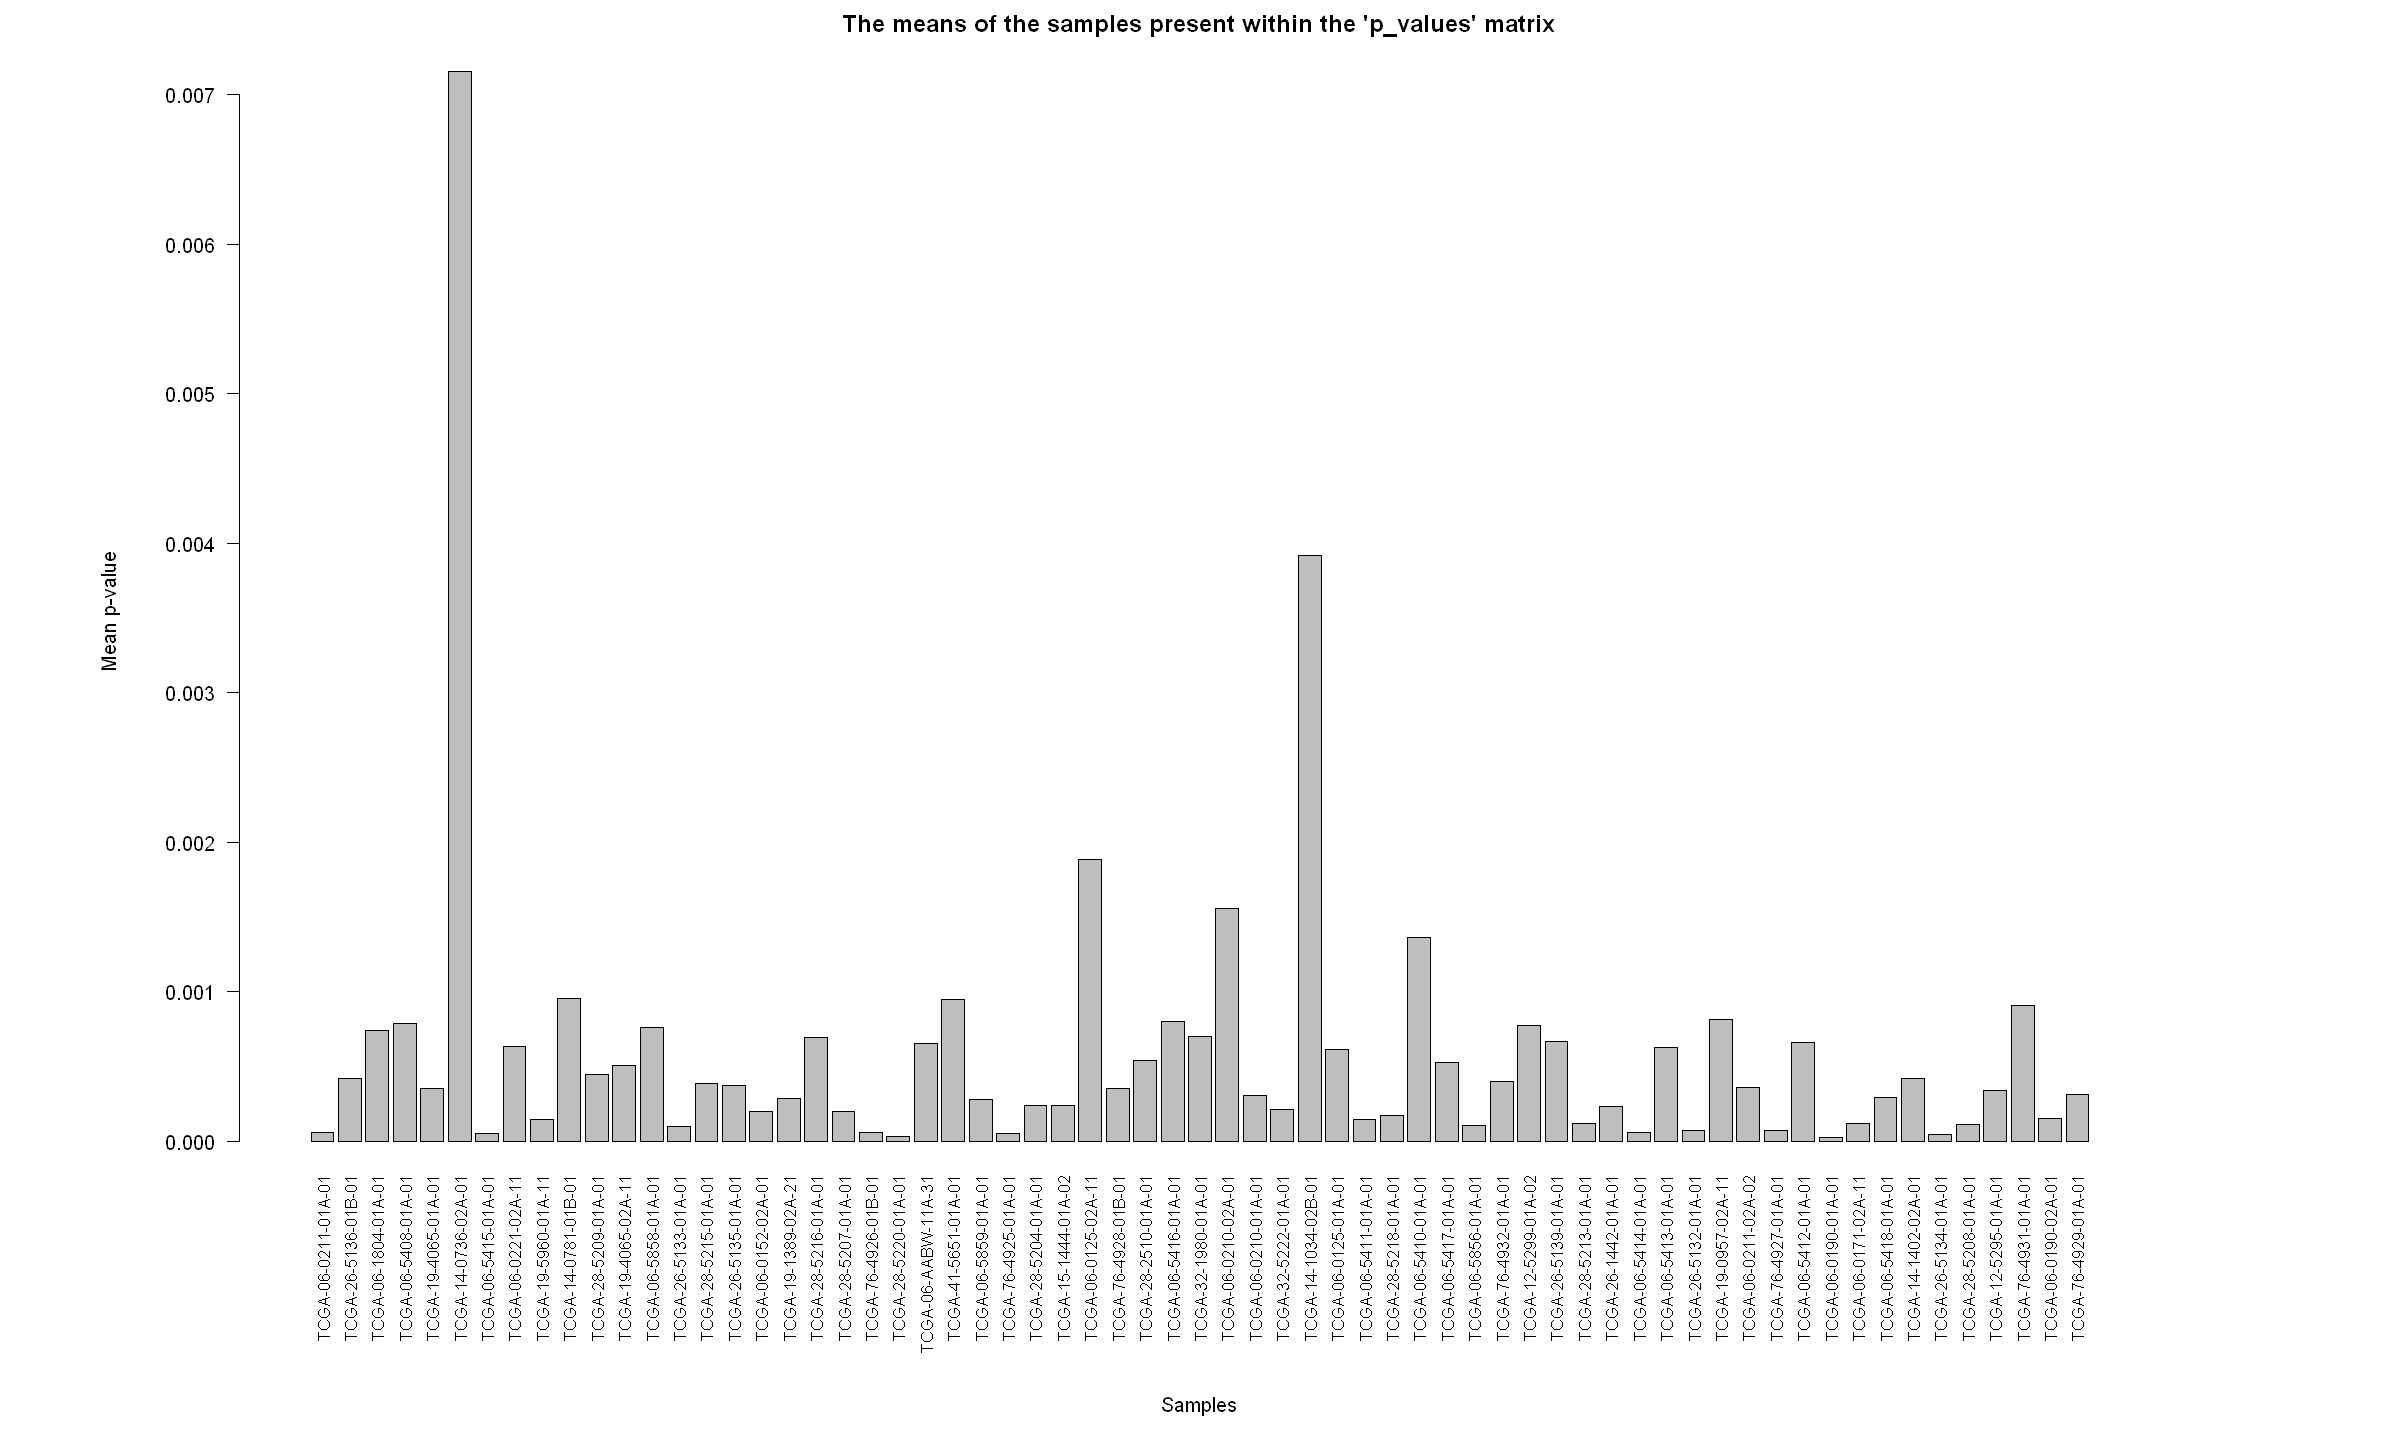

In [46]:
# Plotting the means of the samples present within the 'p_values' matrix by calling the function 'barplot()'.
options(repr.plot.width = 20, repr.plot.height = 12)
par(plt = c(0.1, 0.9, 0.2, 0.95))
barplot(sample_p_values_means, main = "The means of the samples present within the 'p_values' matrix", cex.names = 0.8, las = 2, names.arg = case_ids_column_names)
mtext("Samples", side = 1, line = 10)
mtext("Mean p-value", side = 2, line = 5)

Poor quality samples can be easily excluded from the analysis using a detection p-value cutoff, for example > 0.05 [12]. As we can see from the output above, however, none of these means comes even close to this 0.05 as the sample with the highest value has a mean p-value of around 0.007. Therefore, there is no reason to remove any of the samples from the dataset.

Now that we have looked at these p-values from a sample view, the question is how we handle these individual CpG sites and sample combinations for which the p-value is higher than the significance level chosen. Even if we decide to remove CpG sites for which the number of entries that have a higher p-value than the significance level is pretty high, this would still leave entries present within the 'p-values' matrix for which their p-value is higher than the significance level. As we have already established before, this indicates that there is a high likelihood that these do not represent a true methylation signal. The approach we could take for these is to impute the methylation values that correspond to these p-values. How we will do this is discussed after investigating the number of p-values higher than the significance level for the CpG sites to see whether we need to remove some sites.

The first step that we can take is replace the methylation values in the 'MethylLumi_methylation_bmiq' matrix that correspond to the entries in the 'p_values' matrix for which the p-values are higher than the significance level with NaN (Not A Number) values. This can be done since we either want to remove them or impute them anyway (so the original methylation values are not needed anymore) and it allows us to easier deduce how many NaN values there are. Replacing these methylation values with NaN values can be achieved by looping over all the indices present within the 'indices_p_values_higher' matrix and setting the entries corresponding to these indices in the 'MethylLumi_methylation_bmiq' matrix equal to NaN. Before this, however, we should first check whether any NaN values already appear within the 'MethylLumi_methylation_bmiq' matrix which can be achieved by calling the function 'sum()' in combination with the function 'is.nan()'.

In [47]:
# Retrieving the number of entries present within the 'MethylLumi_methylation_bmiq' matrix that are equal to NaN before 
# setting all the entries corresponding to the indices present in the 'indices_p_values_higher' matrix equal to NaN.
num_NaN_before_replacement <- sum(is.nan(MethylLumi_methylation_bmiq))

cat("The number of entries present within the 'MethylLumi_methylation_bmiq' matrix that are equal to NaN:")
num_NaN_before_replacement

The number of entries present within the 'MethylLumi_methylation_bmiq' matrix that are equal to NaN:

[1] 0

As we can see from the output above, none of the entries present within the 'MethylLumi_methylation_bmiq' matrix are equal to NaN meaning we can safely set all the entries corresponding to the indices present in the 'indices_p_values_higher' matrix equal to NaN.

In [48]:
# Looping over all the indices present within the 'indices_p_values_higher' matrix and setting the entries corresponding to 
# these indices in the 'MethylLumi_methylation_bmiq' matrix equal to NaN.
for (i in 1:nrow(indices_p_values_higher)) {
  row_index <- indices_p_values_higher[i, 1]
  col_index <- indices_p_values_higher[i, 2]
  
  MethylLumi_methylation_bmiq[row_index, col_index] <- NaN
}

cat("The 'MethylLumi_methylation_bmiq' matrix where all the indices present in the 'indices_p_values_higher' matrix are set to NaN:")
MethylLumi_methylation_bmiq

The 'MethylLumi_methylation_bmiq' matrix where all the indices present in the 'indices_p_values_higher' matrix are set to NaN:

,TCGA-06-0211-01A-01,TCGA-26-5136-01B-01,TCGA-06-1804-01A-01,TCGA-06-5408-01A-01,TCGA-19-4065-01A-01,TCGA-14-0736-02A-01,TCGA-06-5415-01A-01,TCGA-06-0221-02A-11,TCGA-19-5960-01A-11,TCGA-14-0781-01B-01,⋯,TCGA-06-0190-01A-01,TCGA-06-0171-02A-11,TCGA-06-5418-01A-01,TCGA-14-1402-02A-01,TCGA-26-5134-01A-01,TCGA-28-5208-01A-01,TCGA-12-5295-01A-01,TCGA-76-4931-01A-01,TCGA-06-0190-02A-01,TCGA-76-4929-01A-01
cg00050873,0.59840112,NaN,NaN,NaN,0.47438447,0.69581871,0.84493123,0.61623271,0.47202409,0.885123010,⋯,0.75809514,0.87214605,NaN,0.79779058,0.78514613,0.82554099,NaN,NaN,0.61197095,NaN
cg00212031,0.14862131,NaN,NaN,NaN,0.04172761,0.03492720,0.03394742,0.03545218,0.01962592,0.040098629,⋯,0.02659521,0.03625907,NaN,NaN,0.03126178,0.33108960,NaN,NaN,0.03131959,0.4785757
cg00213748,0.83659860,NaN,NaN,NaN,0.08101316,NaN,0.74812867,NaN,0.33956508,0.594146364,⋯,0.56464097,0.84623909,NaN,NaN,0.89350322,0.77889111,NaN,NaN,0.51628044,NaN
cg00214611,0.03278583,NaN,NaN,NaN,0.03066364,0.03211055,0.03705312,0.02993877,0.02418746,0.035555153,⋯,0.02969343,0.02564796,NaN,NaN,0.03768739,0.03540415,NaN,NaN,0.02718517,NaN
cg00455876,0.64241639,NaN,NaN,NaN,0.50151355,NaN,0.78324685,0.66426093,0.90071804,0.700768581,⋯,0.67125390,0.81412910,NaN,0.45476310,0.83025158,0.93551294,0.48985739,NaN,0.66448409,NaN
cg01707559,0.67181803,0.31259220,0.55496360,NaN,0.44849919,0.02815279,0.05175546,0.03080771,0.02322145,0.095866733,⋯,0.02604787,0.50407654,0.37702029,0.55193387,0.03963751,0.04011815,0.51652884,0.31480310,0.03320178,0.4954008
cg02004872,0.02034416,0.48037846,NaN,0.463172566,0.02045641,0.01905935,0.01716608,0.01733117,0.01694902,0.018482936,⋯,0.01790629,0.01858624,NaN,0.41129567,0.01963822,0.01824523,0.49157510,NaN,0.01996334,0.5130127
cg02011394,0.97743637,NaN,NaN,NaN,0.69640299,0.98157186,0.98745118,0.96456134,0.98606789,0.979064381,⋯,0.98296809,0.98337529,NaN,0.87496758,0.98998541,0.99056740,NaN,NaN,0.96618108,NaN
cg02050847,0.98320033,NaN,NaN,NaN,0.85060462,0.98161707,0.98451705,0.93984068,0.98756866,0.985187520,⋯,0.98046968,0.98385486,NaN,NaN,0.98173500,0.93418288,NaN,NaN,0.98561006,NaN
cg02233190,0.02324826,NaN,0.44566184,NaN,0.02220239,0.01624558,0.01794982,0.02078766,0.01809217,0.015664321,⋯,0.03208825,0.01407208,0.42487250,0.32277580,0.09258578,0.43041673,0.42139981,NaN,0.02625126,NaN


As we can see from the output above, we can indeed see that now some entries have been replaced with NaN values. We can verify how many entries we have replaced (which should be equal to the number of indices present in the 'indices_p_values_higher' matrix, which is 80,942) by calling the function 'sum()' in combination with the function 'is.nan()'.

In [49]:
# Retrieving the number of entries present within the 'MethylLumi_methylation_bmiq' matrix that are equal to NaN after 
# setting all the entries corresponding to the indices present in the 'indices_p_values_higher' matrix equal to NaN.
num_NaN_after_replacement <- sum(is.nan(MethylLumi_methylation_bmiq))

cat("The number of entries present within the 'MethylLumi_methylation_bmiq' matrix that are equal to NaN:")
num_NaN_after_replacement

The number of entries present within the 'MethylLumi_methylation_bmiq' matrix that are equal to NaN:

[1] 49147

As we can see from the output above, the number of entries present within the 'MethylLumi_methylation_bmiq' matrix that were set to NaN is equal to the number of indices present within the 'indices_p_values_higher' matrix.

Next, we can count how many NaN values appear for each CpG sites by calling the function 'apply()' in combination with the function 'is.nan()'. First of all, we can call the function 'table()' which will retrieve the frequency counts for each of the possible number of NaN values for a CpG site.

In [50]:
# Retrieving how many NaN values appear for each of the CpG sites present within the 'MethylLumi_methylation_bmiq' matrix.
NaN_counts <- apply(is.nan(MethylLumi_methylation_bmiq), 1, sum)

# Retrieving a table featuring the frequency counts for each of the possible number of NaN values for a CpG site.
frequency_counts_NaN <- table(NaN_counts)

cat("The frequency counts for each of the possible number of NaN values for a CpG site:")
frequency_counts_NaN

The frequency counts for each of the possible number of NaN values for a CpG site:

NaN_counts
     0      1      2      3      4      5      6      7      8      9     10 
365835   9184   2687    993    513    312    259    178    144    121     97 
    11     12     13     14     15     16     17     18     19     20     21 
    82     64     58     69     40     30     31     40     28     20     25 
    22     23     24     25     26     27     28     29     30     31     32 
    26     23     26     25     26     42     66    120     35     10      8 
    33     34     35     36     37     38     39     40     41     42     43 
     9      7      3     10      2      5      4      7      3      6      1 
    44     45     46     47     48     49     51     53     54     56     58 
     3      3      5      3      6      1      1      2      2      3      1 
    62     63 
     1      1 

Since just listing the numbers kind of makes it difficult to see how the frequencies of the different number of NaN values relate, we can plot the frequencies for each number of NaN values for a CpG site by calling the function 'barplot()'.

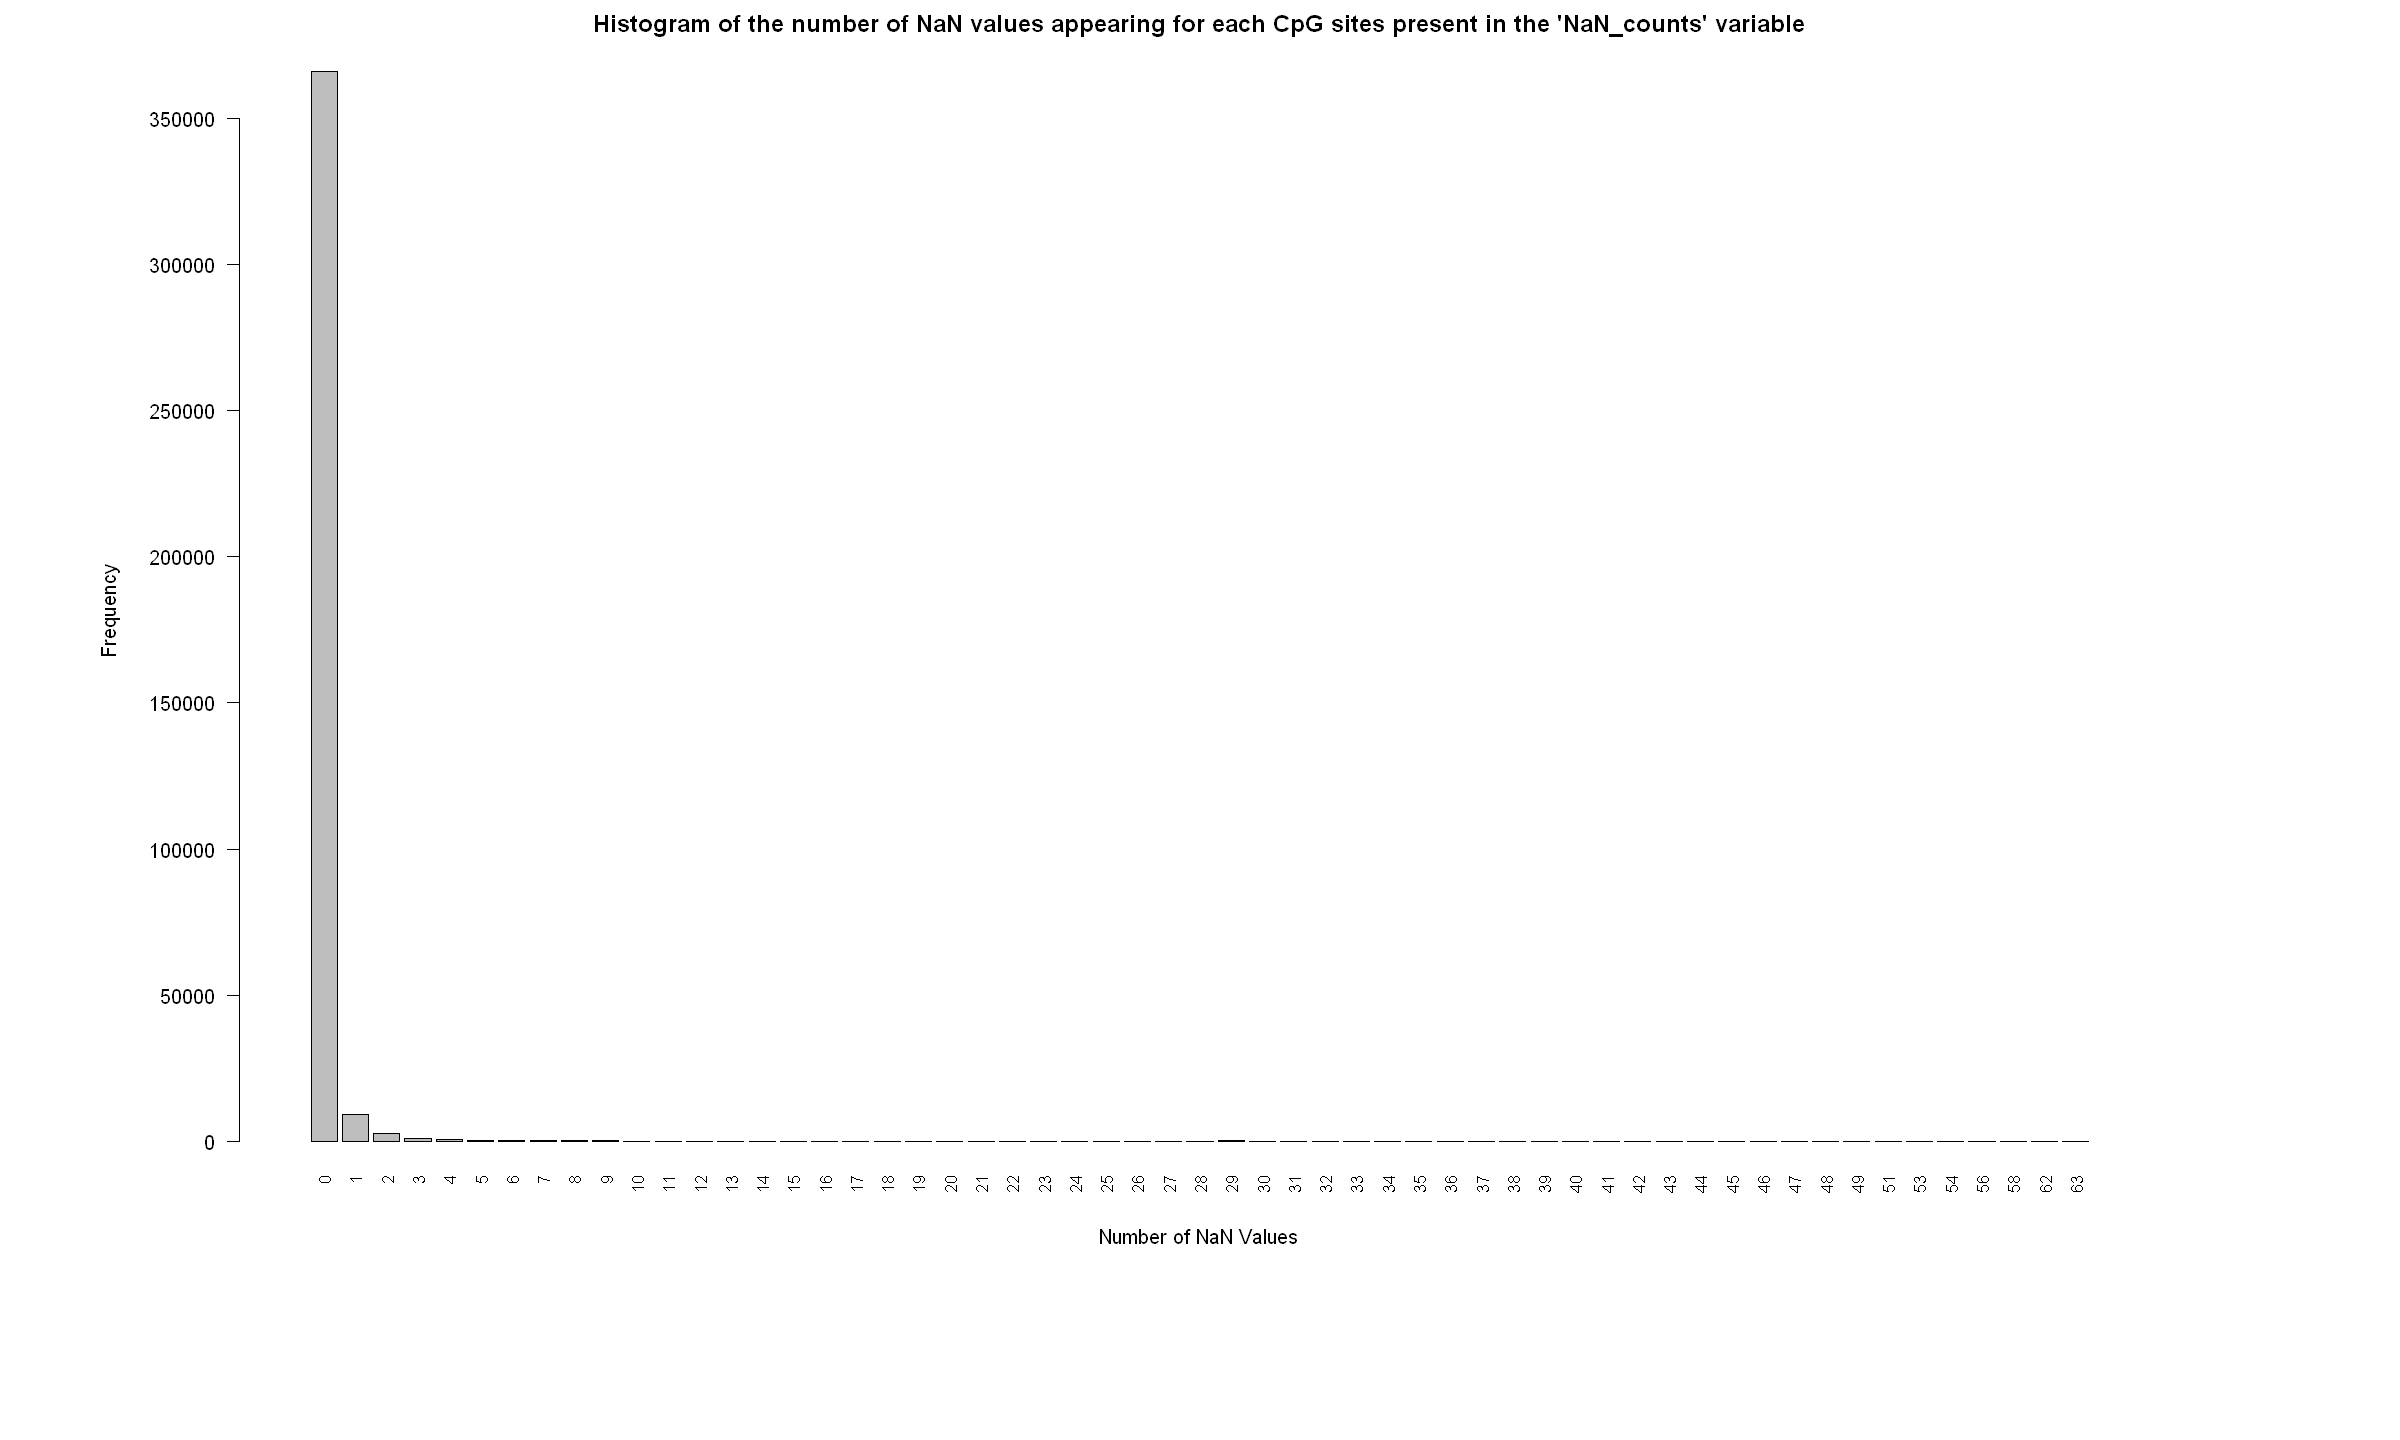

In [51]:
options(repr.plot.width = 20, repr.plot.height = 12)
par(plt = c(0.1, 0.9, 0.2, 0.95))
barplot(frequency_counts_NaN, main = "Histogram of the number of NaN values appearing for each CpG sites present in the 'NaN_counts' variable", xlab = "Number of NaN Values", cex.names = 0.8, las = 2)
mtext("Frequency", side = 2, line = 5)

As we can see from the histogram above, there are a lot of CpG sites for which there are 0 NaN values present within the 'MethylLumi_methylation_bmiq' matrix. To get a more clear idea of how many NaN values appear, we can plot the histogram without plotting the 'frequency_counts_NaN' being equal to 0.

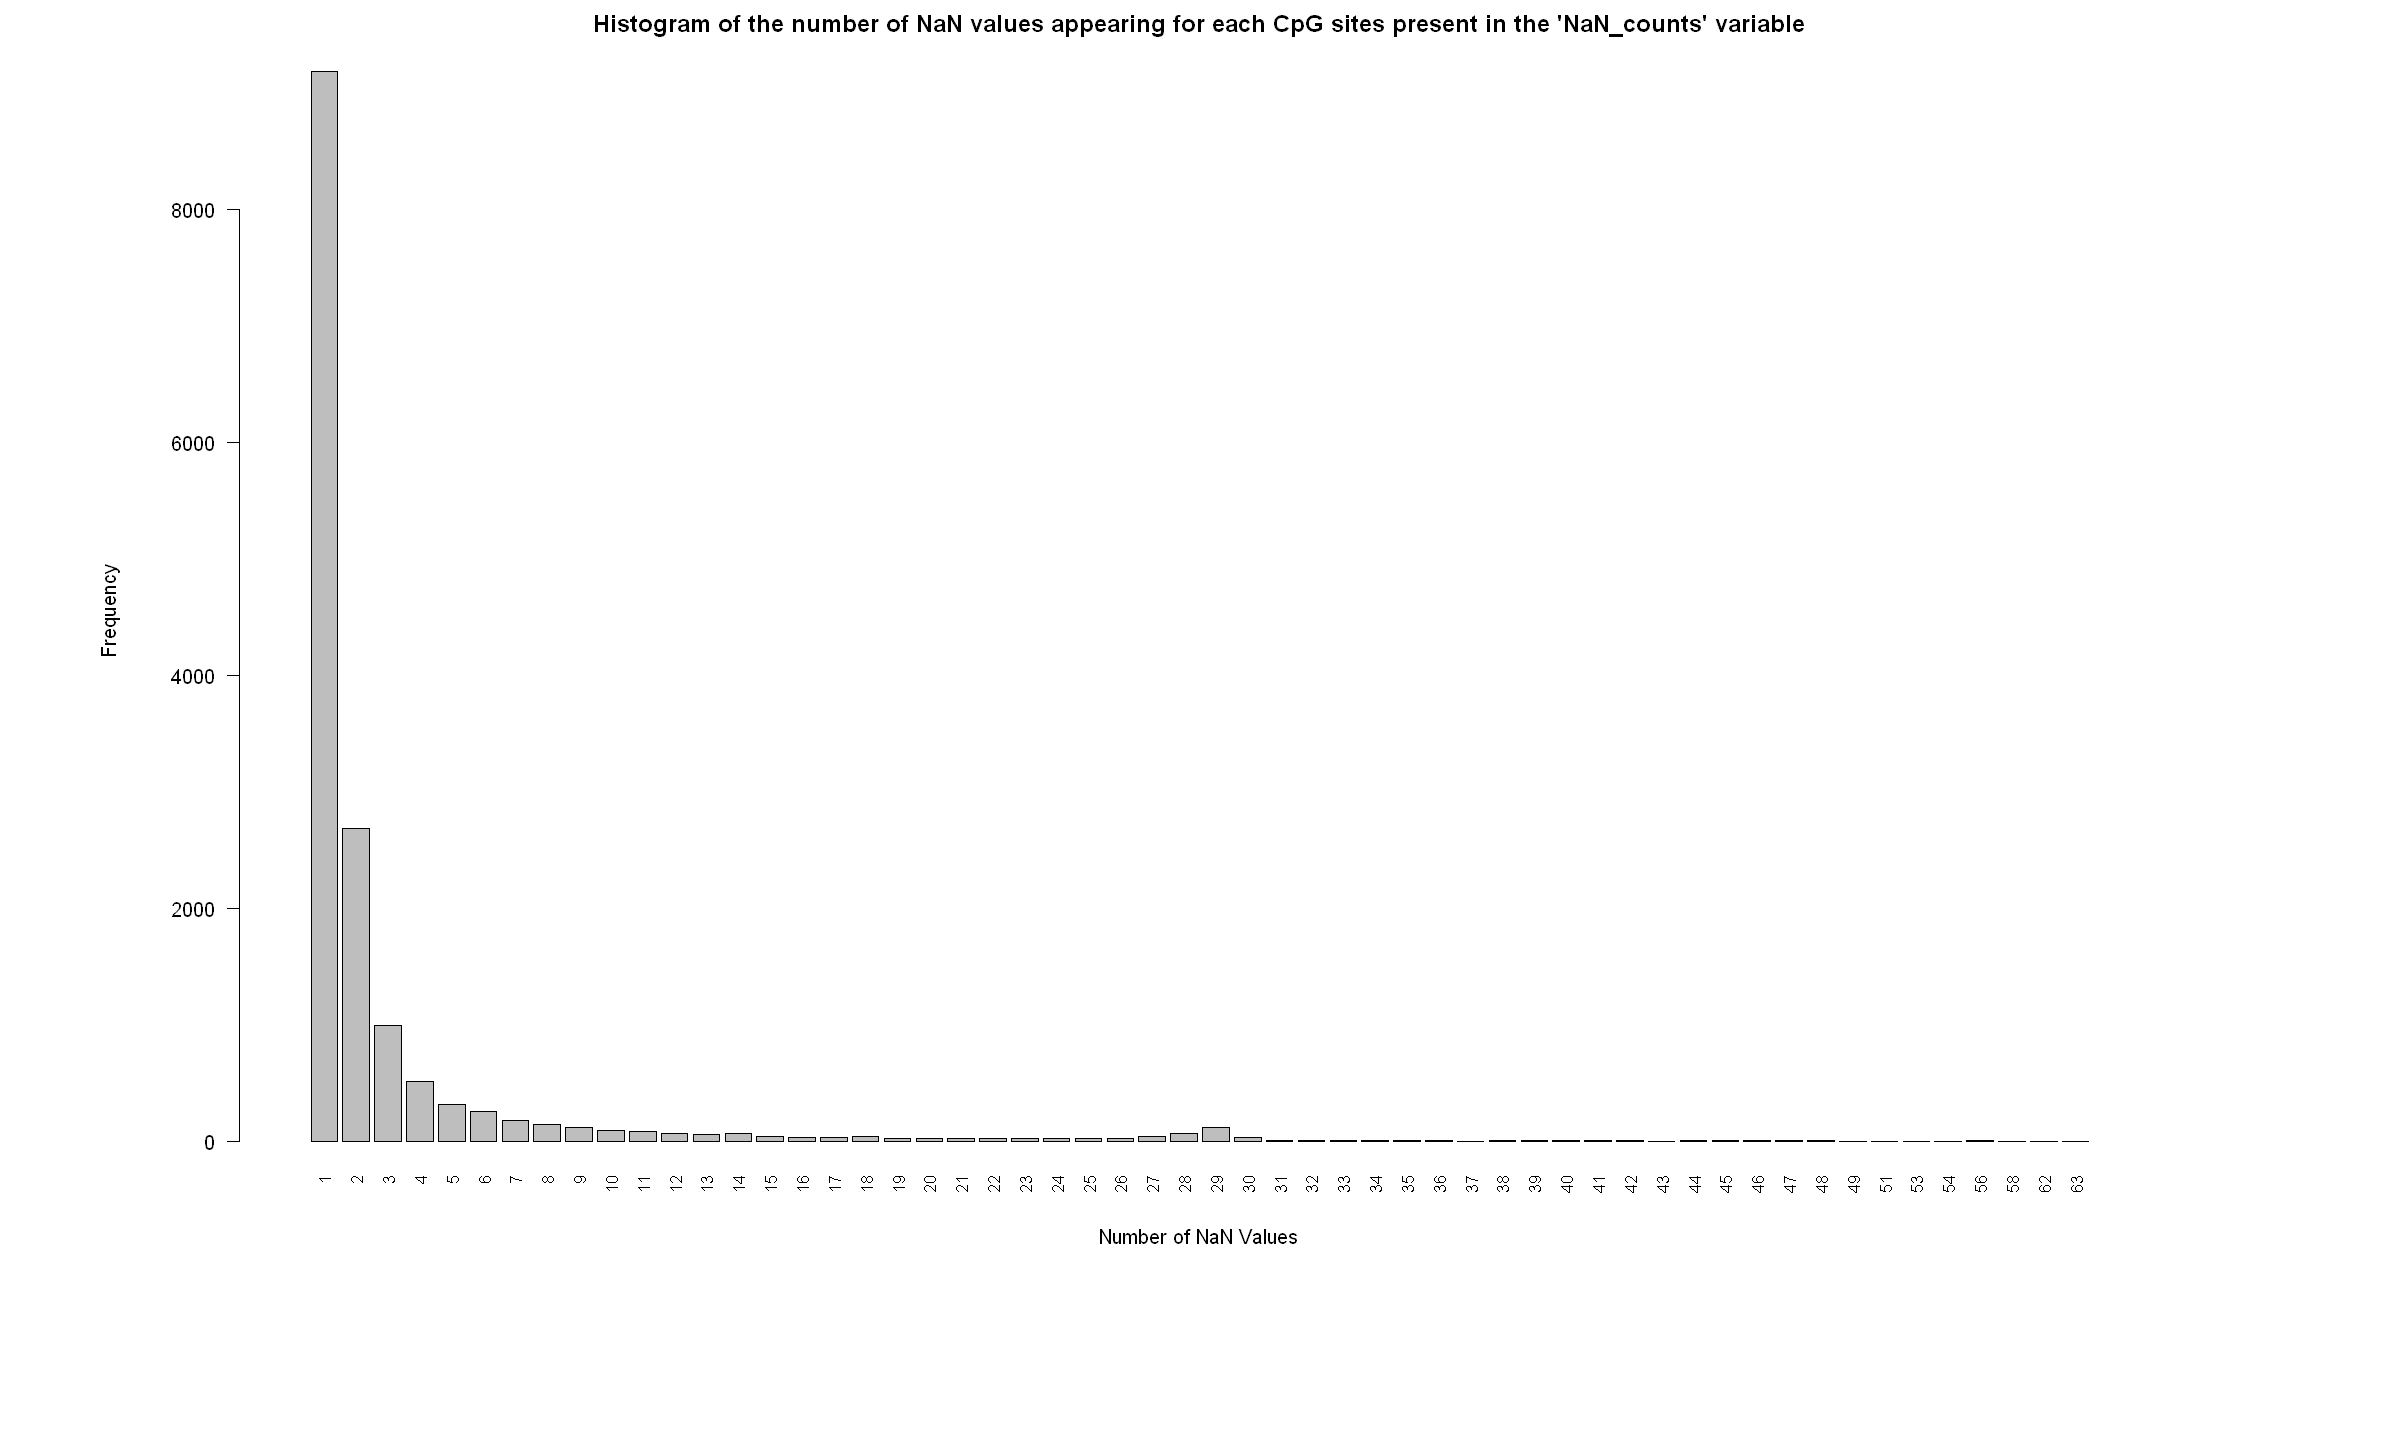

In [52]:
options(repr.plot.width = 20, repr.plot.height = 12)
par(plt = c(0.1, 0.9, 0.2, 0.95))
barplot(frequency_counts_NaN[-1], main = "Histogram of the number of NaN values appearing for each CpG sites present in the 'NaN_counts' variable", xlab = "Number of NaN Values", cex.names = 0.8, las = 2)
mtext("Frequency", side = 2, line = 5)

As we can see from the histogram above, there are quite some CpG sites for which there are quite a few of NaN values present within the 'MethylLumi_methylation_bmiq' matrix. This is also supported when we look at the 'frequency_counts_NaN' displayed above where we can observe that for every number of NaN values that is higher than 30, there are a few CpG sites (but never higher than 10) for which this number of NaN values is higher than 30.

Since I do not want to remove any additional CpG sites when not absolutely needed I will use imputation to substitute the missing values with values that would be expected to occur in those cells. The approach that will be used for this is the k-nearest neighbors algorithm where the k nearest neighbors, the most similar samples to the current sample, are used to determine the value of the cell which currently contains 'NaN'. There is a problem with using this approach as executing the algorithm on rows which contain a high number of NaN values (close to 64) will after imputation contain a lot of values that are nearly duplicated or completely duplicated. Basing the values the whole row on just a few known values (using 1-5 values to predict 64-60 values) does not seem right as we know that there will naturally be some fluctuations within a row. This problem does not just occur for the rows where the number of NaN values is close to 64, but in general we do not know how many non NaN values are needed within a row to make accurate predictions. Naturally, since the cells contain missing values there is then no way of determining whether the prediction made was accurate or not when using this method on the entire dataset.

One thing that we can do, however, is to retrieve a subset of the data that is complete and for some of the rows randomly remove (set to NaN) n cells. The following step is then to perform our k-nearest neighbors algorithm to predict the cells containing the missing values and examining how accurate the predictions were. We can calculate how accurate the predictions were as we still know which values the cells originally contained. For the next iteration we can then increase the number of cells we set to NaN by 1 (in the original complete subset that we created for this part) and calculate the accuracies of the predictions here. By increasing the number of cells we set to NaN, we can eventually compute for which number of NaNs in a row the predictions become too inaccurate. With this we can conclude how many NaN values there can appear in a row for the k-nearest neighbors algorithm to still make an accurate prediction for the missing values. In the original matrix 'MethylLumi_methylation_bmiq' we can then remove the rows which contain a number of NaN values that is higher than the number that the k-nearest neighbors algorithm can still accurately predict. It would be best to remove these rows as we do not want inaccurate information to be used later in the machine learning techniques.

To perform the k-nearest neighbors algorithm on our 'methylation_data' matrix featuring missing values, we would need to use Python as there is a very handy class for that available called 'KNNImputer()'. Therefore, a second part of this notebook is created which is located in the same directory and is called 'Further Processing Methylation Files Part 2' that will handle the continuation of dealing with the CpG site sample combination for which the p-value is higher than the significance level chosen before. In addition, this notebook will also handle additional processing steps such as a general exploratory data analysis as well as removing sites that are always methylated or never methylated, outlier detection (and possible removal) through PCA, and transforming the methylation beta values to M-values.

To also be able to use the matrix 'MethylLumi_methylation_bmiq' in that second notebook, we can store it to the directory called 'data_directory_combined_not_cleaned_files'. Before we do this, however, we first should make sure that we store all the information (like the CpG site names and the sample names) which can be achieved by converting the matrix 'MethylLumi_methylation_bmiq' to a data table called 'methylation_data' by calling the function 'as.data.table()'.

In [53]:
# Converting the matrix 'MethylLumi_methylation_bmiq' to a data table called 'methylation_data' by calling the function 
# 'as.data.table()'.
methylation_data <- data.table("CpG sites" = rownames(MethylLumi_methylation_bmiq), as.data.table(MethylLumi_methylation_bmiq))

cat("The 'methylation_data' data table featuring all the necessary information:")
methylation_data

The 'methylation_data' data table featuring all the necessary information:

CpG sites,TCGA-06-0211-01A-01,TCGA-26-5136-01B-01,TCGA-06-1804-01A-01,TCGA-06-5408-01A-01,TCGA-19-4065-01A-01,TCGA-14-0736-02A-01,TCGA-06-5415-01A-01,TCGA-06-0221-02A-11,TCGA-19-5960-01A-11,⋯,TCGA-06-0190-01A-01,TCGA-06-0171-02A-11,TCGA-06-5418-01A-01,TCGA-14-1402-02A-01,TCGA-26-5134-01A-01,TCGA-28-5208-01A-01,TCGA-12-5295-01A-01,TCGA-76-4931-01A-01,TCGA-06-0190-02A-01,TCGA-76-4929-01A-01
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cg00050873,0.59840112,NaN,NaN,NaN,0.47438447,0.69581871,0.84493123,0.61623271,0.47202409,⋯,0.75809514,0.87214605,NaN,0.79779058,0.78514613,0.82554099,NaN,NaN,0.61197095,NaN
cg00212031,0.14862131,NaN,NaN,NaN,0.04172761,0.03492720,0.03394742,0.03545218,0.01962592,⋯,0.02659521,0.03625907,NaN,NaN,0.03126178,0.33108960,NaN,NaN,0.03131959,0.4785757
cg00213748,0.83659860,NaN,NaN,NaN,0.08101316,NaN,0.74812867,NaN,0.33956508,⋯,0.56464097,0.84623909,NaN,NaN,0.89350322,0.77889111,NaN,NaN,0.51628044,NaN
cg00214611,0.03278583,NaN,NaN,NaN,0.03066364,0.03211055,0.03705312,0.02993877,0.02418746,⋯,0.02969343,0.02564796,NaN,NaN,0.03768739,0.03540415,NaN,NaN,0.02718517,NaN
cg00455876,0.64241639,NaN,NaN,NaN,0.50151355,NaN,0.78324685,0.66426093,0.90071804,⋯,0.67125390,0.81412910,NaN,0.45476310,0.83025158,0.93551294,0.48985739,NaN,0.66448409,NaN
cg01707559,0.67181803,0.31259220,0.55496360,NaN,0.44849919,0.02815279,0.05175546,0.03080771,0.02322145,⋯,0.02604787,0.50407654,0.37702029,0.55193387,0.03963751,0.04011815,0.51652884,0.31480310,0.03320178,0.4954008
cg02004872,0.02034416,0.48037846,NaN,0.463172566,0.02045641,0.01905935,0.01716608,0.01733117,0.01694902,⋯,0.01790629,0.01858624,NaN,0.41129567,0.01963822,0.01824523,0.49157510,NaN,0.01996334,0.5130127
cg02011394,0.97743637,NaN,NaN,NaN,0.69640299,0.98157186,0.98745118,0.96456134,0.98606789,⋯,0.98296809,0.98337529,NaN,0.87496758,0.98998541,0.99056740,NaN,NaN,0.96618108,NaN
cg02050847,0.98320033,NaN,NaN,NaN,0.85060462,0.98161707,0.98451705,0.93984068,0.98756866,⋯,0.98046968,0.98385486,NaN,NaN,0.98173500,0.93418288,NaN,NaN,0.98561006,NaN


Now that we have converted our matrix to a data table called 'methylation_data', we can store it to the directory called 'data_directory_combined_not_cleaned_files' by calling the function 'fwrite()' from the 'data.table' library which takes as arguments the data table to be stored and the location where the data table should be stored.

In [54]:
# The path where the 'methylation_data' data table should be stored.
path <- file.path(data_directory_combined_not_cleaned_files, "methylation_data_partly_cleaned_containing_NaN.csv")

# If the 'path' defined above does already point to a file, the execution of this code block is terminated and a message is 
# displayed informing that the file already exists.
if (file.exists(path)) {
    cat(paste("There is already a file present at the path: ", path))
} else {
    # Writing the data table to a CSV file.
    data.table::fwrite(methylation_data, path)
    cat(paste("The file has been created at the path: ", path))
}

The file has been created at the path:  C:/Users/laure/OneDrive/Documenten/Bachelor Thesis Data/combined_not_cleaned_data/methylation_data_partly_cleaned_containing_NaN.csv